# 🍷 Анализ рынка вина: что влияет на цену и рейтинг?

## Описание проекта 
Исследование данных о винах для выявления факторов, влияющих на цену и рейтинг продукта. Анализ включает сравнение традиционных (Старый Свет) и новых (Новый Свет) винодельческих регионов.

**Источник данных:** [Kaggle - Wine Reviews](https://www.kaggle.com/datasets/zynicide/wine-reviews)

## Задачи этапа "Предобработка данных":
* Очистка данных и удаление дубликатов
* Обработка пропущенных значений
* Feature Engineering — создание новых признаков
* Анализ базовой статистики
* Сохранение очищенного набора данных

## Оглавление

1. Импорт библиотек
2. Загрузка данных
3. Удаление дубликатов
4. Обработка пропущенных значений
5. Feature Engineering — создание новых признаков
6. Описательная статистика
7. Сохранение очищенного датасета
8. Выводы по этапу предобработки данных

---

## Описание данных
Набор данных состоит из 13 признаков (2 числовых и 11 категориальных):

| Признак | Тип | Описание |
|---------|-----|----------|
| `country` | Категориальный | Страна происхождения вина |
| `description` | Текстовый | Описание вкусового профиля вина |
| `designation` | Категориальный | Виноградник, ягоды которого используются при изготовлении вина |
| `points` | Числовой | Оценка вина по шкале от 1 до 100 |
| `price` | Числовой | Стоимость одной бутылки вина |
| `province` | Категориальный | Место изготовления вина (провинция или штат) |
| `region_1` | Категориальный | Винодельческая область в провинции |
| `region_2` | Категориальный | Конкретная зона виноделия в области |
| `variety` | Категориальный | Сорт винограда для изготовления вина |
| `winery` | Категориальный | Винодельня-производитель вина |
| `taster_name` | Текстовый | Имя автора рецензии            
| `taster_twitter_handle` | Текстовый | Твиттер-аккаунт рецензента

## 1. Импорт библиотек

In [98]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set_theme(style='white', palette='rocket', color_codes=True)
import squarify

from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

from scipy.stats import shapiro

from sklearn.preprocessing import MinMaxScaler
from scipy import stats as st
import scipy

import warnings; warnings.filterwarnings('ignore', category=FutureWarning)

## 2. Загрузка данных

Данные взяты из открытого источника (платформы Kaggle) в формате *.csv

In [2]:
df = pd.read_csv('data/winemag-data-130k-v2.csv')
df.sample(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
128233,128233,France,From vines in the heart of the Entre-deux-Mers...,NaN,87,26.0,Bordeaux,Bordeaux,NaN,Roger Voss,@vossroger,Château Jean de Bel Air 2015 Bordeaux,Bordeaux-style Red Blend,Château Jean de Bel Air
29684,29684,France,This is a crisp and deliciously tangy wine fro...,Pavillon Sur Lie,88,17.0,Loire Valley,Muscadet Côtes de Grandlieu,NaN,Roger Voss,@vossroger,Domaine du Haut Bourg 2014 Pavillon Sur Lie (...,Melon,Domaine du Haut Bourg


Для дальнейшего анализа необходимо изучить данные.  
Первичный осмотр данных: df.info()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


Количество значений в столбцах различается. Это говорит о том, что в данных есть пустые значения.  
Признак points и price числовые. 

## 3. Дедупликация 

Unnamed: 0 - удаляем технический индекс (создаёт видимость отсутствия дубликатов)

In [4]:
columns_to_drop = ['Unnamed: 0'] 
df = df.drop(columns_to_drop, axis=1)

In [5]:
print('Дубликаты до очистки:', df.duplicated().sum())

Дубликаты до очистки: 9983


Примеры дубликатов

In [6]:
df[df.duplicated()].head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2408,US,"This is weighty, creamy and medium to full in ...",NaN,85,14.0,California,North Coast,North Coast,Virginie Boone,@vboone,Souverain 2010 Chardonnay (North Coast),Chardonnay,Souverain
2409,Italy,There's a touch of toasted almond at the start...,Sallier de la Tour,85,13.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Tasca d'Almerita 2011 Sallier de la Tour Grill...,Grillo,Tasca d'Almerita
2410,Chile,Lightly herbal strawberry and raspberry aromas...,Reserve,85,13.0,Maipo Valley,NaN,NaN,Michael Schachner,@wineschach,Tres Palacios 2011 Reserve Pinot Noir (Maipo V...,Pinot Noir,Tres Palacios


Было обнаружено 9983 полных дубликатов - идентичных записей по всем признакам, включая текстовое описание.  
**Принятое решение:** Удалить все дубликаты, оставив первое вхождение, чтобы избежать смещения в анализе.

In [7]:
print('Дубликаты до очистки:', df.duplicated().sum())
df = df.drop_duplicates(keep='first')
print('Дубликаты после очистки:', df.duplicated().sum())
print('Размер датасета после очистки:', df.shape)

Дубликаты до очистки: 9983
Дубликаты после очистки: 0
Размер датасета после очистки: (119988, 13)


## 4. Обработка пропущенных значений

* Признаки, связанные с экспертной оценкой (**taster_name**, **taster_twitter_handle**), сохранены без изменений для анализа в соответствующем разделе исследования.

*Примечание: Детальный разбор экспертной составляющей перенесен в раздел 2.1 "Анализ экспертов".*

Количество пустых значений для каждого признака:

In [8]:
df.isna().sum()

country                     59
description                  0
designation              34545
points                       0
price                     8395
province                    59
region_1                 19560
region_2                 73219
taster_name              24917
taster_twitter_handle    29446
title                        0
variety                      1
winery                       0
dtype: int64

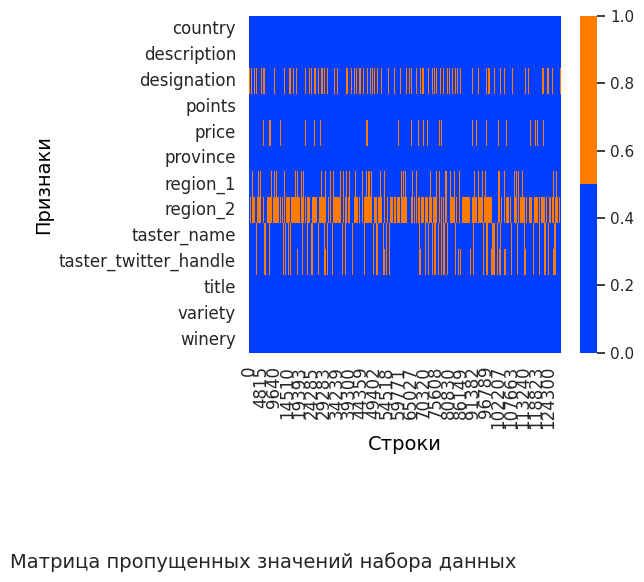

In [9]:
sns.heatmap(df.T.isnull(),
            cmap=sns.color_palette(palette='bright', n_colors=2))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Строки', fontsize=14, color='k')
plt.ylabel('Признаки', fontsize=14, color='k')
plt.figtext(
    -0.01, -0.2,
    'Матрица пропущенных значений набора данных',
    fontsize=14)
plt.tight_layout() 
plt.show()

Процент пустых значений для каждого признака:

In [10]:
lost_values = df.isna().sum()
percentage = lost_values/(df.isna().count())
lost_data = pd.concat([lost_values, percentage],
                      axis=1, keys=['lost_values', 'percentage'])*100
lost_data.sort_values(by=['percentage'], ascending=False)

,lost_values,percentage
region_2,7321900,61.021936
designation,3454500,28.790379
taster_twitter_handle,2944600,24.540787
taster_name,2491700,20.766243
region_1,1956000,16.301630
price,839500,6.996533
province,5900,0.049172
country,5900,0.049172
variety,100,0.000833
points,0,0.000000


* **Unnamed: 0** - технических столбец, удаляется
* Столбец с признаком **region_2**, незаполненный на 61,1% удаляется

In [11]:
columns_to_drop = ['region_2'] 
df = df.drop(columns_to_drop, axis=1)

* **designation** (виноградник), незаполненный на 28,8%  
  заполняю Unknown (не известен)

In [12]:
df['designation'] = df['designation'].fillna('Unknown')

* **region_1** (16,3% пропусков)  
заполняю из province (есть все значения, географическое название уровнем выше)

In [13]:
df['region_1'] = df['region_1'].fillna(df['province'])

* **price** (6,9% пропусков), очень важный признак  
  заполняю методом иерархического заполнения (от частного к общему)

In [14]:
warnings.filterwarnings('ignore')

df['price'] = df.groupby(['country', 'province', 'variety'])['price'].transform(
    lambda x: x.fillna(x.median())
)
df['price'] = df.groupby(['country', 'variety'])['price'].transform(
    lambda x: x.fillna(x.median())
)
df['price'] = df.groupby('variety')['price'].transform(
    lambda x: x.fillna(x.median())
)
df['price'] = df['price'].fillna(df['price'].median())

In [15]:
df.isna().sum()

country                     59
description                  0
designation                  0
points                       0
price                        0
province                    59
region_1                    59
taster_name              24917
taster_twitter_handle    29446
title                        0
variety                      1
winery                       0
dtype: int64

* **country**, **province**, **region_1**

Проверка полного совпадения пропусков

In [16]:
country_na = set(df[df['country'].isna()].index)
province_na = set(df[df['province'].isna()].index)  
region_na = set(df[df['region_1'].isna()].index)

print(f"- Только country: {len(country_na - province_na - region_na)}")
print(f"- Только province: {len(province_na - country_na - region_na)}")
print(f"- Только region_1: {len(region_na - country_na - province_na)}")
print(f"- country + province: {len(country_na & province_na - region_na)}")
print(f"- country + region_1: {len(country_na & region_na - province_na)}")
print(f"- province + region_1: {len(province_na & region_na - country_na)}")
print(f"- Все три: {len(country_na & province_na & region_na)}")

- Только country: 0
- Только province: 0
- Только region_1: 0
- country + province: 0
- country + region_1: 0
- province + region_1: 0
- Все три: 59


59 строки полностью лишены географического контекста

In [17]:
no_geo_data = df[df['country'].isna() & df['province'].isna() & df['region_1'].isna()]

print("Характеристики строк без географических данных:")
print(f"Количество: {len(no_geo_data)}")
print(f"Уникальные сорта: {no_geo_data['variety'].nunique()}")
print(f"Уникальные винодельни: {no_geo_data['winery'].nunique()}")
print(f"Диапазон цен: у.е.{no_geo_data['price'].min():.0f} - у.е.{no_geo_data['price'].max():.0f}")
print(f"Диапазон рейтингов: {no_geo_data['points'].min()} - {no_geo_data['points'].max()}")


Характеристики строк без географических данных:
Количество: 59
Уникальные сорта: 31
Уникальные винодельни: 27
Диапазон цен: у.е.16 - у.е.43
Диапазон рейтингов: 82 - 92


Дальнейшие исследования будут завязаны на географии, удаляю данные без этих признаков.

In [18]:
count_before = len(df)
df = df.dropna(subset=['country', 'province', 'region_1'], how='all')
count_after = len(df)
print(f"Удалено {count_before - count_after} строк без географических данных")

Удалено 59 строк без географических данных


* **variety** - 1 шт

In [19]:
df = df[df['variety'].notna()]

* финальная проверка

In [20]:
df.isna().sum()

country                      0
description                  0
designation                  0
points                       0
price                        0
province                     0
region_1                     0
taster_name              24916
taster_twitter_handle    29445
title                        0
variety                      0
winery                       0
dtype: int64

In [21]:
df.sample()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
126325,US,"Aromas of butterscotch, herb and barrel spice ...",Unknown,87,28.0,Washington,Columbia Valley (WA),Sean P. Sullivan,@wawinereport,Vital 2015 Cabernet Sauvignon (Columbia Valley...,Cabernet Sauvignon,Vital


## 5. Feature Engineering - создание новых признаков

Добавлены дополнительные характеристики для анализа:

- **`continent`** - континент происхождения вина
- **`color`** - цвет вина (red/white)
- **`year`** - год производства

### **continent** (континент)

In [22]:
country_to_continent = {
    'Italy': 'Europe',
    'Portugal': 'Europe',
    'US': 'North America',
    'Spain': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Argentina': 'Latin America',
    'Chile': 'Latin America',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'South Africa': 'Africa',
    'New Zealand': 'Oceania',
    'Israel': 'Asia',
    'Hungary': 'Europe',
    'Greece': 'Europe',
    'Romania': 'Europe',
    'Mexico': 'Latin America',
    'Canada': 'North America',
    'Turkey': 'Asia',
    'Czech Republic': 'Europe',
    'Slovenia': 'Europe',
    'Luxembourg': 'Europe',
    'Croatia': 'Europe',
    'Georgia': 'Europe',
    'Uruguay': 'Latin America',
    'England': 'Europe',
    'Lebanon': 'Asia',
    'Serbia': 'Europe',
    'Brazil': 'Latin America',
    'Moldova': 'Europe',
    'Morocco': 'Africa',
    'Peru': 'Latin America',
    'India': 'Asia',
    'Bulgaria': 'Europe',
    'Cyprus': 'Europe',
    'Armenia': 'Asia',
    'Switzerland': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Ukraine': 'Europe',
    'Slovakia': 'Europe',
    'Macedonia': 'Europe',
    'China': 'Asia',
    'Egypt': 'Africa',
    'Montenegro': 'Europe',
    'South Korea': 'Asia', 
    'US-France': 'North America'
}

In [23]:
df['continent'] = df['country'].map(country_to_continent)

### **color** (цвет вина)

In [24]:
color = {
    'Chardonnay': 'white',
    'Pinot Noir': 'red',
    'Cabernet Sauvignon': 'red',
    'Red Blend': 'red',
    'Bordeaux-style Red Blend': 'red',
    'Sauvignon Blanc': 'white',
    'Syrah': 'red',
    'Riesling': 'white',
    'Merlot': 'red',
    'Zinfandel': 'red',
    'Sangiovese': 'red',
    'Malbec': 'red',
    'White Blend': 'white',
    'Rosé': 'rose', 
    'Tempranillo': 'red',
    'Nebbiolo': 'red',
    'Portuguese Red': 'red',
    'Sparkling Blend': 'sparkling',
    'Shiraz': 'red',
    'Corvina, Rondinella, Molinara': 'red',
    'Rhône-style Red Blend': 'red',
    'Barbera': 'red',
    'Pinot Gris': 'white',
    'Viognier': 'white',
    'Bordeaux-style White Blend': 'white',
    'Champagne Blend': 'sparkling', 
    'Port': 'red',
    'Grüner Veltliner': 'white',
    'Gewürztraminer': 'white',
    'Portuguese White': 'white',
    'Petite Sirah': 'red',
    'Carmenère': 'red',
    'Portuguese Sparkling': 'sparkling',
    'Portuguese Rosé': 'rose',
    'Provence rosé': 'rose',
    'Rosado': 'rose',
    'Grenache': 'red',
    'Gamay': 'red',
    'Primitivo': 'red',
    "Nero d'Avola": 'red',
    'Frappato': 'red',
    'Monica': 'red',
    'Graciano': 'red',
    'Blaufränkisch': 'red',
    'G-S-M': 'red',
    'Furmint': 'white',
    'Catarratto': 'white',
    'Grillo': 'white',
    'Assyrtico': 'white',
    'Friulano': 'white',
    'Petit Manseng': 'white',
    'Meritage': 'red',
    'Prugnolo Gentile': 'red',
    'Touriga Nacional': 'red'
}

In [25]:
df['color'] = df['variety'].map(color)

In [26]:
df.isna().sum()

country                      0
description                  0
designation                  0
points                       0
price                        0
province                     0
region_1                     0
taster_name              24916
taster_twitter_handle    29445
title                        0
variety                      0
winery                       0
continent                    0
color                    19333
dtype: int64

Сорта винограда, для которых не указан цвет в исходном словаре:

In [27]:
missing_color_varieties = df[df['color'].isna()]['variety'].unique()
print(f'Сорта без цвета: {len(missing_color_varieties)} шт')

Сорта без цвета: 648 шт


In [28]:
variety_counts = df[df['color'].isna()]['variety'].value_counts()
variety_counts.head(5)

variety
Cabernet Franc       1242
Pinot Grigio          980
Sangiovese Grosso     696
Glera                 646
Tempranillo Blend     553
Name: count, dtype: int64

Ключевые слова по категориям для дальнейшей классификации вин:

In [29]:
missing_color_varieties

array(['Tempranillo-Merlot', 'Nerello Mascalese', 'Tempranillo Blend',
       'Chenin Blanc', 'Viognier-Chardonnay', 'Inzolia', 'Petit Verdot',
       'Cabernet Franc', 'Aglianico', 'Albariño', 'Vernaccia', 'Rosato',
       'Vermentino', 'Grenache Blanc', 'Shiraz-Cabernet Sauvignon',
       'Pinot Blanc', 'Alsace white blend', 'Tannat-Cabernet',
       'Sauvignon', 'Sangiovese Grosso', 'Torrontés', 'Verdejo',
       'Fumé Blanc', 'Pinot Bianco', 'Bonarda', 'Montepulciano',
       'Moscato', 'Ugni Blanc-Colombard', 'Syrah-Viognier',
       'Carignan-Grenache', 'Sagrantino', 'Savagnin',
       'Cabernet Sauvignon-Syrah', 'Prosecco', 'Vignoles', 'Muscat',
       'Muscadelle', 'Shiraz-Viognier', 'Garganega', 'Pinot Grigio',
       'Zierfandler', 'Cortese', 'Mencía', 'Zweigelt', 'Melon',
       'Rhône-style White Blend', 'Vidal', 'Cannonau', 'Verdelho',
       'Marsanne', 'Scheurebe', 'Kerner', 'Syrah-Grenache', 'Dolcetto',
       'Vilana', 'Glera', 'Viura', 'Garnacha Tintorera', 'Pinot Ner

In [30]:
WHITE_KEYWORDS = [
    'blanc', 'white', 'chardonnay', 'sauvignon', 'riesling', 'viognier', 
    'gewürz', 'pinot gris', 'pinot grigio', 'verdejo', 'albariño', 'vermentino',
    'chenin blanc', 'semillon', 'fumé blanc', 'marsanne', 'pinot blanc',
    'vernaccia', 'silvaner', 'malvasia', 'garganega', 'roussanne', 
    'torrontés', 'verdicchio', 'trebbiano', 'verdelho', 'fiano', 'godello',
    'pecorino', 'arneis', 'greco', 'aligoté', 'cortese', 'macabeo',
    'inzolia', 'auxerrois', 'grauburgunder', 'savatiano', 'greco bianco',
    'weissburgunder', 'müller-thurgau', 'scheurebe', 'kerner', 'sylvaner',
    'fiano', 'früburgunder', 'avesso', 'xarel-lo', 'greco', 'ribolla gialla',
    'weissburgunder', 'traminer', 'marsanne-roussanne', 'prié blanc',
    'muscadelle', 'bical', 'viura-chardonnay', 'gelber muskateller',
    'turbiana', 'alvarinho', 'manzoni', 'malagousia', 'assyrtiko',
    'welschriesling', 'rieslaner', 'traminette', 'seyval blanc',
    'muscat canelli', 'arinto', 'pecorino', 'rotgipfler', 'picpoul',
    'vidal blanc', 'albanello', 'arneis', 'altesse', 'blanc du bois',
    'nosiola', 'godello', 'pedro ximénez', 'auxerrois', 'albana',
    'carricante', 'encruzado', 'torbato', 'pallagrello', 'siria',
    'asprinio', 'feteascǎ regalǎ', 'sideritis', 'viosinho', 'malvar',
    'airen', 'erbaluce', 'verdosilla', 'biancolella', 'rolle',
    'orangetraube', 'žilavka', 'gouveio', 'bombino bianco',
    'sauvignon musqué', 'rivaner', 'doña blanca', 'graševina',
    'cococciola', 'romorantin', 'savatiano', 'rebula', 'bacchus',
    'azal', 'paralleda', 'maria gomes', 'biancolella', 'aidani',
    'bombino bianco', 'grolleau', 'zlahtina', 'elbling', 'misket',
    'robola', 'folle blanche', 'meseguera', 'biancu gentile',
    'verdeca', 'cayuga', 'biancale', 'ansonica', 'sercial', 'jampal',
    'trajadura', 'catalanesca', 'favorita', 'dafni', 'kotsifali',
    'roscetto', 'torontel', 'athiri'
]
RED_KEYWORDS = [
    'noir', 'cabernet', 'merlot', 'syrah', 'shiraz', 'malbec', 'tempranillo',
    'sangiovese', 'nebbiolo', 'zinfandel', 'pinotage', 'garnacha', 'mourvèdre',
    'tannat', 'petit verdot', 'primitive', 'monastrell', 'carignan', 'dolcetto',
    'bonarda', 'montepulciano', 'aglianico', 'nerello', 'xinomavro', 'cannonau',
    'teroldego', 'lagrein', 'baco noir', 'norton', 'saperavi', 'gaglioppo',
    'uva di troia', 'feteasca neagra', 'boğazkere', 'negrette', 'graciano',
    'blaufränkisch', 'frappato', 'monica', 'prugnolo gentile', 'touriga nacional',
    'meritage', 'petit verdot', 'cinsault', 'tinta miúda', 'monastrell',
    'negroamaro', 'mourvèdre', 'müller-thurgau', 'pinot meunier', 'teroldego',
    'pansa blanca', 'muskat ottonel', 'claret', 'baga', 'refosco',
    'aragonês', 'agiorgitiko', 'ruché', 'tinta de toro', 'cabernet moravia',
    'chambourcin', 'nero di troia', 'cesanese', 'feteasca neagra', 'lagrein',
    'tinta fina', 'st. laurent', 'pugnitello', 'cerceal', 'tinta roriz',
    'grenache-syrah', 'cabernet merlot', 'aragonez', 'magliocco', 'gamay noir',
    'spätburgunder', 'lemberger', 'saperavi', 'mondeuse', 'perricone',
    'carignano', 'pallagrello', 'morava', 'aleatico', 'carcajolu', 'kisi',
    'palomino', 'nascetta', 'schiava', 'alfrocheiro', 'corvina', 'norton',
    'alicante bouschet', 'carignan', 'black muscat', 'grenache noir',
    'durella', 'xinomavro', 'petite verdot', 'valdiguié', 'kangoun',
    'loureiro', 'posip', 'gros and petit manseng', 'jacquère', 'kalecik karasi',
    'karasakiz', 'negrette', 'raboso', 'país', 'mauzac', 'diamond', 'marzemino',
    'tinta barroca', 'castelão', 'teran', 'trepat', 'freisa', 'marzemino',
    'merlot-tannat', 'rkatsiteli', 'trousseau gris', 'brachetto', 'mantonico',
    'ekigaïna', 'muskateller', 'argaman', 'bobal', 'baco noir', 'veltliner',
    'morillon', 'touriga franca', 'picolit', 'prieto picudo', 'gaglioppo',
    'sacy', 'piedirosso', 'mansois', 'susumaniello', 'vitovska', 'carignane',
    'nerello cappuccio', 'counoise', 'macabeo', 'mazuelo', 'vranec', 'mavrud',
    'debit', 'verdil', 'cabernet', 'treixadura', 'coda di volpe', 'forcallà',
    'bombino nero', 'mavrotragano', 'bovale', 'frankovka', 'gragnano',
    'schwartzriesling', 'petit meslier', 'bastardo', 'vidadillo', 'babić',
    'roviello', 'yapincak', 'mandilaria', 'teroldego rotaliano',
    'trebbiano di lugana', 'albarossa', 'black monukka', 'chardonel',
    'uvalino', 'boğazkere', 'vermentino nero', 'tinta amarela',
    'tinta negra mole', 'chelois', 'durif', 'franconia', 'nasco', 'sirica',
    'vital', 'espadeiro', 'blatina', 'karalahna', 'colorino', 'centesimino',
    'ramisco', 'gamza', 'mavrokalavryta', 'babosa negro', 'petit courbu',
    'parraleta', 'francisa', 'kuntra', 'pignolo', 'caprettone', 'ondenc'
]
ROSE_KEYWORDS = [
    'rosé', 'rose', 'rosado', 'rosato', 'pink', 'blush', 
    'vin rosé', 'rosé wine', 'pink wine', 'blush wine',
    'weissherbst', 'clairet', 'schillerwein', 'rosato'
]
SPARKLING_KEYWORDS = [
    'sparkling', 'champagne', 'prosecco', 'spätburgunder', 
    'claret', 'sherry', 'port', 'madeira', 'lambrusco',
    'brachetto', 'pied de perdrix', 'cava', 'crémant',
    'franciacorta', 'asti', 'sekt', 'moscato d\'asti',
    'cap classique', 'espumante', 'método tradicional',
    'traditional method', 'charmat', 'pét-nat', 'pétillant',
    'frizzante', 'mousseux', 'pearl', 'bubbly',
    'carbonated', 'effervescent', 'prosecco'
]

In [31]:
def color_detection(variety_name):
    if pd.isna(variety_name):
        return 'unknown'
    
    variety_lower = str(variety_name).lower()

    if any(keyword in variety_lower for keyword in ROSE_KEYWORDS):
        return 'rose'
    
    elif any(keyword in variety_lower for keyword in SPARKLING_KEYWORDS):
        return 'sparkling'
    
    elif any(keyword in variety_lower for keyword in WHITE_KEYWORDS):
        return 'white'
    
    elif any(keyword in variety_lower for keyword in RED_KEYWORDS):
        return 'red'
    
    elif 'blend' in variety_lower:
        if 'white' in variety_lower:
            return 'white'
        elif 'red' in variety_lower:
            return 'red'
        elif 'rosé' in variety_lower or 'rose' in variety_lower:
            return 'rose'
        elif 'sparkling' in variety_lower:
            return 'sparkling'
        else:
            return 'unknown'
    
    else:
        return 'unknown'

Итого категории цвета:
* **`red`** - красные
* **`white`** - белые
* **`sparkling`** - игристые
* **`rose`** - розовые
* **`unknown`** - неивестные

In [32]:
df['color'] = df['color'].fillna(df['variety'].apply(color_detection))

print('Оставшиеся пропуски:', df['color'].isna().sum())
print('\nРаспределение цветов:')
print(df['color'].value_counts())

Оставшиеся пропуски: 0

Распределение цветов:
color
red          71969
white        37280
rose          3635
sparkling     3632
unknown       3412
Name: count, dtype: int64


Применяем ту же функцию `color_detection` к `title` вместо `variety`

In [33]:
unknown_mask = df['color'] == 'unknown'
df.loc[unknown_mask, 'color'] = df.loc[unknown_mask, 'title'].apply(color_detection)

print("Результаты применения color_detection к title:")
print(f"Было unknown: {unknown_mask.sum()}")
print(f"Стало unknown: {(df['color'] == 'unknown').sum()}")
print(f"Улучшено классификаций: {unknown_mask.sum() - (df['color'] == 'unknown').sum()}")

print("\nФинальное распределение цветов:")
print(df['color'].value_counts())

Результаты применения color_detection к title:
Было unknown: 3412
Стало unknown: 2429
Улучшено классификаций: 983

Финальное распределение цветов:
color
red          71973
white        37394
rose          4311
sparkling     3821
unknown       2429
Name: count, dtype: int64


Все пропуски заполнены  

**Многоуровневая классификация:**
 **Первичная:** На основе сорта винограда (variety) - 97% успеха
2. **Вторичная:** На основе названия вина (title) - дополнительно 983 вина

**Финальное распределение:**
- Красные: 60.0% (71,973)
- Белые: 32% (37,394) 
- Розовые: 3.6% (4,311)
- Игристые: 3.2% (3,821)
- Неизвестные: 2.0% (2,429)

**Эффективность:** 98% вин успешно классифицированы

### **year**  
  Отбираются только реальные годы, диапазон (1900-2025)

In [34]:
df['year'] = df['title'].str.extract(r'\b(19[0-9]{2}|20[0-1][0-9]|202[0-5])\b').astype('Int64')

print("Статистика по годам после фильтрации:")
print(f"Извлечено: {df['year'].notna().sum()} записей")
print(f"Диапазон: {df['year'].min()} - {df['year'].max()}")

Статистика по годам после фильтрации:
Извлечено: 115645 записей
Диапазон: 1904 - 2017


* Создание возрастных групп
  2017 - последний год в данных

In [35]:
df['wine_age'] = 2017 - df['year']
df['age_category'] = pd.cut(df['wine_age'], 
                           bins=[0, 3, 10, 20, 50, df['wine_age'].max()],
                           labels=['Молодое', 'Выдержанное', 'Зрелое', 'Винтаж', 'Антиквар'])

In [36]:
df['age_category'].value_counts()

age_category
Выдержанное    74539
Молодое        26235
Зрелое         14623
Винтаж           203
Антиквар          34
Name: count, dtype: int64

In [37]:
df.isna().sum()

country                      0
description                  0
designation                  0
points                       0
price                        0
province                     0
region_1                     0
taster_name              24916
taster_twitter_handle    29445
title                        0
variety                      0
winery                       0
continent                    0
color                        0
year                      4283
wine_age                  4283
age_category              4294
dtype: int64

## 6. Описательная статистика

* Категориальные признаки

In [38]:
df.describe(include=['O'])

,country,description,designation,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,continent,color
count,119928,119928,119928,119928,119928,95012,90483,119928,119928,119928,119928,119928
unique,43,119895,37955,425,1601,19,15,118780,701,16745,6,5
top,US,"Seductively tart in lemon pith, cranberry and ...",Unknown,California,Napa Valley,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers,Europe,red
freq,50457,2,34534,33656,4174,23558,23558,9,12275,211,55896,71973


In [39]:
print('В наборе данных представлено:')
print(f'- {df['country'].nunique()} стран (самая часто встречающаяся - {df['country'].mode()[0]})')
print(f'- {df['province'].nunique()} провинций (самая часто встречающаяся - {df['province'].mode()[0]})')
print(f'- {df['variety'].nunique()} сортов винограда (самый часто встречающийся - {df['variety'].mode()[0]})')
print(f'- {df['color'].nunique()} цветов вина (самый часто встречающийся - {df['color'].mode()[0]})')

В наборе данных представлено:
- 43 стран (самая часто встречающаяся - US)
- 425 провинций (самая часто встречающаяся - California)
- 701 сортов винограда (самый часто встречающийся - Pinot Noir)
- 5 цветов вина (самый часто встречающийся - red)


* Числовые признаки

In [40]:
df.describe()

,points,price,year,wine_age
count,119928.000000,119928.000000,115645.0,115645.0
mean,88.442149,35.215521,2010.572476,6.427524
std,3.093287,40.840919,3.846875,3.846875
min,80.000000,4.000000,1904.0,0.0
25%,86.000000,17.000000,2009.0,4.0
50%,88.000000,25.000000,2011.0,6.0
75%,91.000000,42.000000,2013.0,8.0
max,100.000000,3300.000000,2017.0,113.0


In [41]:
print(f'Числовые признаки:')
print(f'- Диапазон изменения рейтинга {df['points'].min()}-{df['points'].max()}. Среднее значение {df['points'].mean():.1f}. Медианное значение {df['points'].median()}.')
print(f'- Диапазон изменения стоимости от {df['price'].min():.0f} у.е. до {df['price'].max():.0f} у.е. Среднее значение = {df['price'].mean():.2f} у.е. Медианное {df['price'].median():.0f} у.е.')

Числовые признаки:
- Диапазон изменения рейтинга 80-100. Среднее значение 88.4. Медианное значение 88.0.
- Диапазон изменения стоимости от 4 у.е. до 3300 у.е. Среднее значение = 35.22 у.е. Медианное 25 у.е.


Такое различие может говорить о наличии аномально высоких значений по цене.

In [42]:
print(f'Общая информация:')
print(f'- Размер датасета: {df.shape[0]:,} строк, {df.shape[1]} столбцов')

Общая информация:
- Размер датасета: 119,928 строк, 17 столбцов


## 7. Сохранение очищенного датасета

Сохраняем очищенный датасет для последующего использования

In [43]:
df_cleaned = df.copy()
df_cleaned.to_csv('data/wine_reviews_cleaned.csv', index=False)

print("Датасет успешно сохранен: wine_reviews_cleaned.csv")
print(f"Размер: {df_cleaned.shape[0]:,} строк, {df_cleaned.shape[1]} столбцов")

Датасет успешно сохранен: wine_reviews_cleaned.csv
Размер: 119,928 строк, 17 столбцов


Проверка сохраненнёного файла

In [44]:
df_check = pd.read_csv('data/wine_reviews_cleaned.csv')
print(f"- Размер: {df_check.shape[0]:,} строк × {df_check.shape[1]} столбцов")
print(f"- Пропуски: {df_check.isna().sum().sum()} (обработаны)")
print(f"- Дубликаты: {df_check.duplicated().sum()}")

- Размер: 119,928 строк × 17 столбцов
- Пропуски: 67221 (обработаны)
- Дубликаты: 0


## 8. Выводы по этапу "Предобработка данных"

### 🔧 Технические результаты обработки

#### Дедупликация и очистка
- **Обнаружено и удалено:** 9,983 полных дубликатов
- **Финальный размер:** 119,988 строк × 17 столбцов
- **Качество данных:** 0 пропусков в ключевых признаках, 0 дубликатов

#### 📊 Обработка пропущенных значений
| Признак | Пропуски | Решение |
|---------|----------|---------|
| `region_2` | 61% | 🗑️ Удален |
| `designation` | 29% | 📝 Заполнен "Unknown" |
| `region_1` | 16% | 🗺️ Заполнен из `province` |
| Географические данные | 59 строк | 🗑️ Удалены (31 сорт, у.е.16-43, 82-92 балла) |

#### ✅ Качество данных после обработки
**🎯 Полностью заполнены (100%):**
- 🌍 География: `country`, `province`, `region_1`
- 📊 Основные метрики: `points`, `price`, `variety`
- 📝 Текстовые данные: `description`, `title`

**⚠️ Частично заполнены (реалистично):**
- 👨‍💼 Экспертные данные: `taster_name` (79.2%), `taster_twitter_handle` (75.5%)
- 📅 Временные данные: `year`, `wine_age`, `age_category` (96.4%)

### 🎯 Создание новых признаков

#### 🌐 Географические
- **`continent`**: 6 континентов на основе стран происхождения

#### 🎨 Цветовая классификация
- **`color`**: 5 категорий для 701 сорта винограда
- **Эффективность:** 97% успешной классификации

#### 📅 Временные
- **`year`**: Год производства (извлечен из 96% названий)
- **`wine_age`**: Возраст вина на момент обзора
- **`age_category`**: Категория выдержки

**📈 Статистика годов:**
- **Диапазон:** 1904-2017 годы
- **Пиковые годы:** 2012-2014 (наибольшая представленность)

### 📊 Статистические характеристики

#### 🌍 География
- **43 страны** (лидер: US)
- **425 регионов** (лидер: California)

#### 🍇 Сорта винограда
- **701 уникальный сорт**
- **Самый популярный:** Pinot Noir

#### ⭐ Рейтинги
- **Диапазон:** 80-100 баллов
- **Среднее:** 88.4
- **Медиана:** 88

#### 💰 Цены
- **Диапазон:** 4-3,300 у.е.
- **Среднее:** 35.2 у.е.
- **Медиана:** 25 у.е.
- **Инсайт:** Присутствует премиальный сегмент

#### 🎨 Распределение цветов
| Цвет | Количество | Доля |
|------|------------|------|
| 🍷 Красные | 71,973 | 60% |
| 🍸 Белые | 37,394 | 31% |
| 🌸 Розовые | 4,311 | 4% |
| 🥂 Игристые | 3,821 | 3% |
| ❓ Неизвестные | 2,429 | 2% |

### 💡 Ключевые инсайты

#### ✅ Успехи обработки
- **Высокое качество исходных данных** - минимальное количество критических пропусков
- **Эффективная классификация** - 97% сортов успешно отнесены к цветовым категориям
- **Комплексное обогащение** - данные дополнены географическими и временными признаками

#### 🚀 Готовность к анализу
**Набор данных прошел полный цикл предобработки:**
- ✅ Очищен от дубликатов и пропусков
- ✅ Обогащен новыми признаками
- ✅ Сохранен для последующего использования
- ✅ Готов для углубленного EDA и моделирования

---

**🎯 Результат:** Создан качественный, очищенный и обогащенный датасет для комплексного анализа рынка вина.

## 2. Общая статистика и распределения

### Матрица корреляции

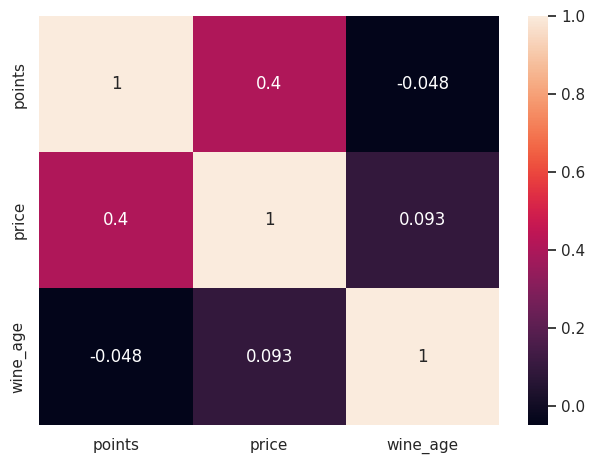

In [45]:
sns.heatmap(df[['points', 'price', 'wine_age']].corr(), annot=True)
plt.tight_layout() 
plt.show()

In [46]:
def interpret_correlation(value, feature1, feature2):
    abs_value = abs(value)
    if abs_value >= 0.7:
        strength = "сильная"
    elif abs_value >= 0.5:
        strength = "умеренная" 
    elif abs_value >= 0.3:
        strength = "слабая"
    else:
        strength = "очень слабая"
    
    direction = "положительная" if value > 0 else "отрицательная"
    
    return f"{strength} {direction} связь"

corr = df[['points', 'price', 'wine_age']].corr()

features = [
    ('price', 'points', 'Цена', 'Рейтинг'),
    ('wine_age', 'points', 'Возраст', 'Рейтинг'), 
    ('wine_age', 'price', 'Возраст', 'Цена')
]

for feat1, feat2, name1, name2 in features:
    corr_value = corr.loc[feat1, feat2]
    interpretation = interpret_correlation(corr_value, name1, name2)
    
    print(f"{name1} ↔ {name2}: r = {corr_value:.3f}")
    print(f"   - {interpretation}")

Цена ↔ Рейтинг: r = 0.404
   - слабая положительная связь
Возраст ↔ Рейтинг: r = -0.048
   - очень слабая отрицательная связь
Возраст ↔ Цена: r = 0.093
   - очень слабая положительная связь


### Матрица диаграмм рассеяния

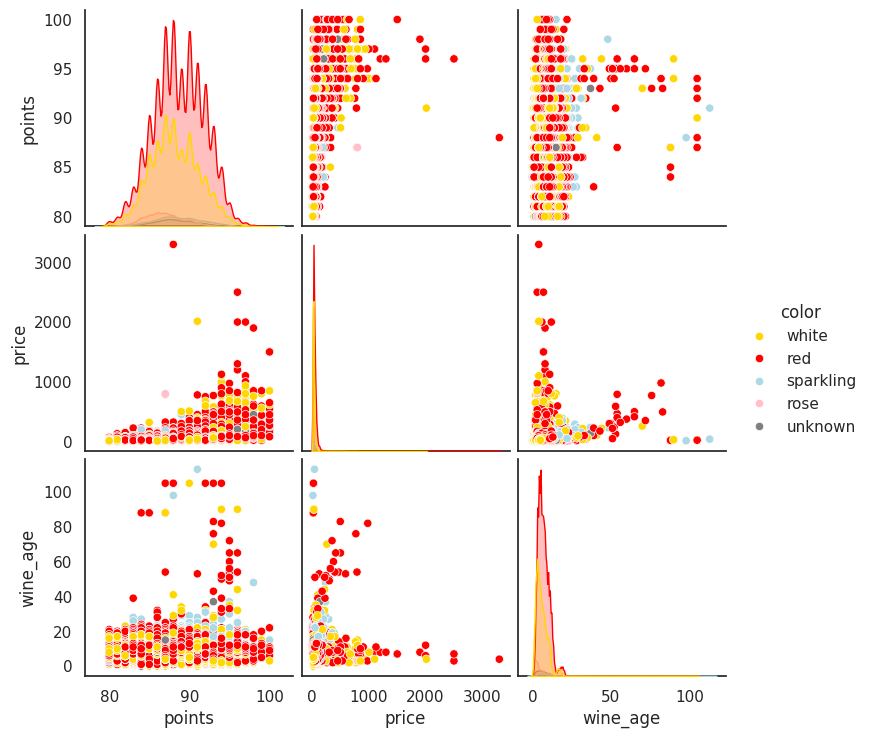

In [47]:
sns.pairplot(df[['points', 'price', 'wine_age', 'color']], 
             hue='color', 
             palette={'red': 'red', 'white': 'gold', 'rose': 'pink', 
                     'sparkling': 'lightblue', 'unknown': 'gray'})
plt.show()

   - Возрастная структура: экспоненциальное распределение с преобладанием молодых вин
   - Ценовое распределение: полимодальное с концентрацией в низком ценовом сегменте
   - Линейные зависимости: слабо выражены визуально
   - Группировка данных: отсутствует четкая кластеризация по цветовым категориям
   - Сбалансированность: удовлетворительная по цвету вина
   - По стоимости есть много выбросов, большая скученность данных. Создаем логарифмированную цену (Разница в 1 единицу = цена отличается в ~2.7 раза)

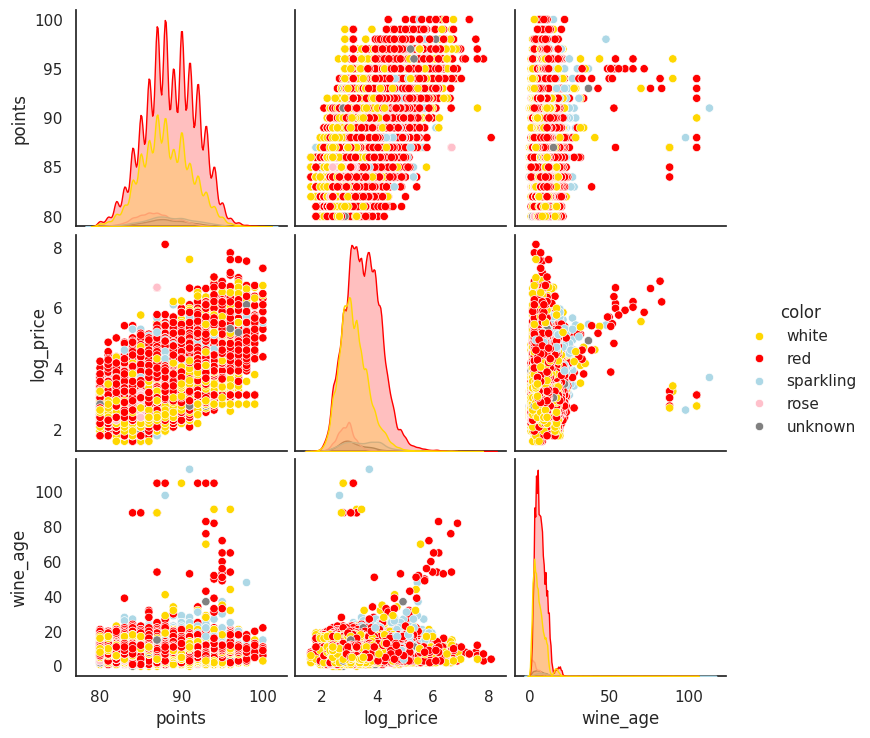

In [48]:
df['log_price'] = np.log1p(df['price'])

sns.pairplot(df[['points', 'log_price', 'wine_age', 'color']], 
             hue='color',
             palette={'red': 'red', 'white': 'gold', 'rose': 'pink', 
                     'sparkling': 'lightblue', 'unknown': 'gray'})

In [49]:
color_log_means = df.groupby('color')['log_price'].mean()
print("Средние log_price по цветам:")
for color, log_mean in color_log_means.items():
    actual_price = np.expm1(log_mean)
    print(f"- {color}: log_price = {log_mean:.2f} → примерно у.е.{actual_price:.0f}")

Средние log_price по цветам:
- red: log_price = 3.48 → примерно у.е.32
- rose: log_price = 2.90 → примерно у.е.17
- sparkling: log_price = 3.53 → примерно у.е.33
- unknown: log_price = 3.16 → примерно у.е.22
- white: log_price = 3.16 → примерно у.е.23


- Красные вина имеют более высокий log_price, что соответствует их премиальному позиционированию
- Розовые вина сосредоточены в области низких log_price, подтверждая их бюджетный статус
- Линейная зависимость между points и log_price стала более выраженной

## 2.2. Анализ географического распределения  

* География, общая статистика

In [50]:
print(f"• Всего стран: {df['country'].nunique()}")
print(f"• Всего континентов: {df['continent'].nunique()}")
print(f"• Всего регионов/провинций: {df['province'].nunique()}")
print(f"• Всего винодельческих областей: {df['region_1'].nunique()}")

• Всего стран: 43
• Всего континентов: 6
• Всего регионов/провинций: 425
• Всего винодельческих областей: 1601


* Распределение по континентам

In [51]:
continent_stats = df.groupby('continent').agg({
    'country': 'nunique',
    'points': 'mean',
    'price': 'mean',
    'variety': 'nunique'
}).round(2).sort_values('country', ascending=False)

print(continent_stats)

               country  points  price  variety
continent                                     
Europe              24   88.62  36.18      563
Asia                 6   88.38  30.39       63
Latin America        6   86.52  22.60      106
Africa               3   88.04  24.46       59
North America        2   88.56  36.67      258
Oceania              2   88.47  32.32       72


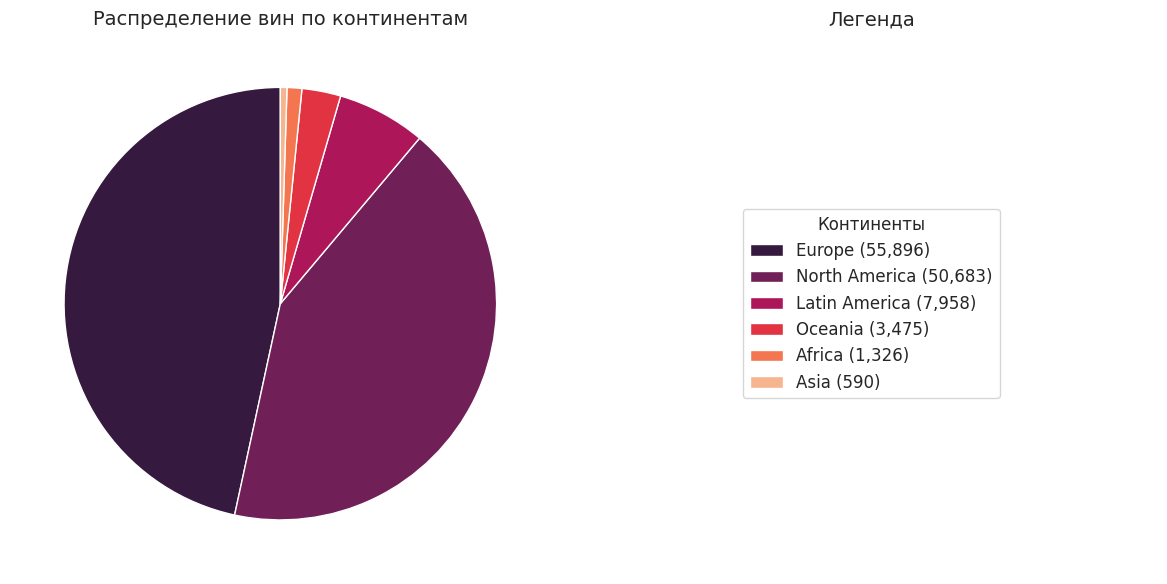

In [52]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
continent_data = df['continent'].value_counts()
patches, texts = plt.pie(continent_data.values,
                        labels=None, 
                        autopct=None,
                        startangle=90)
plt.title('Распределение вин по континентам', fontsize=14)

plt.subplot(1, 2, 2)
plt.axis('off') 
legend_labels = [f'{continent} ({count:,})' for continent, count in continent_data.items()]
plt.legend(patches, legend_labels, 
          title="Континенты", 
          loc="center", 
          frameon=True,
          fontsize=12)
plt.title('Легенда', fontsize=14)

plt.tight_layout()
plt.show()

* Цвета вин по континентам

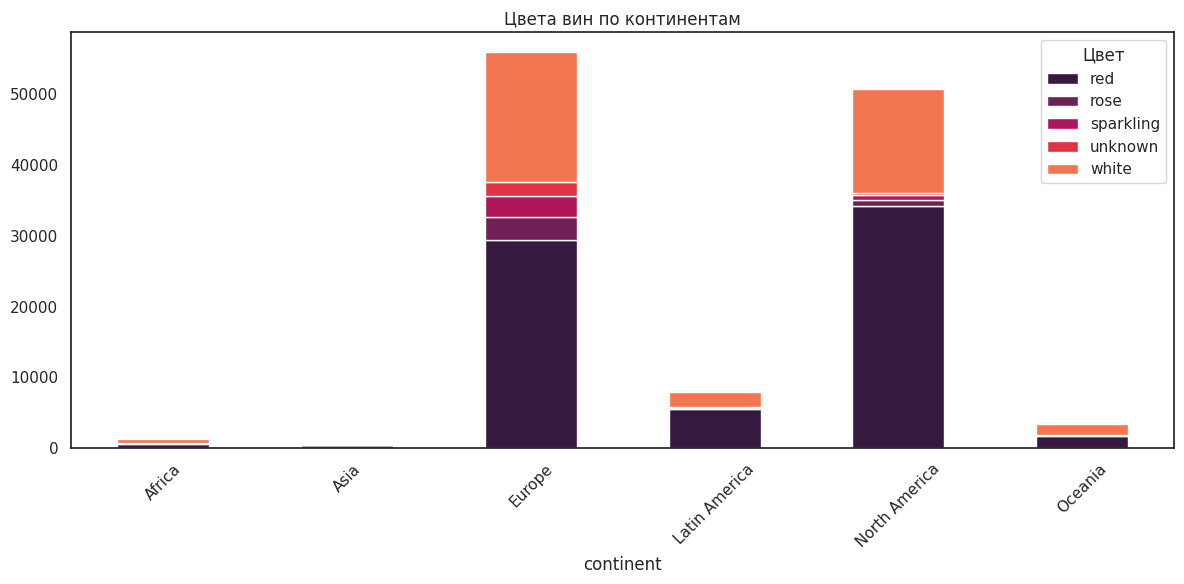

In [53]:
color_by_continent = pd.crosstab(df['continent'], df['color'])
color_by_continent.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Цвета вин по континентам')
plt.xticks(rotation=45)
plt.legend(title='Цвет')
plt.tight_layout()
plt.show()

* Treemap: распределение вин по странам
  подвыборка для скорости 10K записей

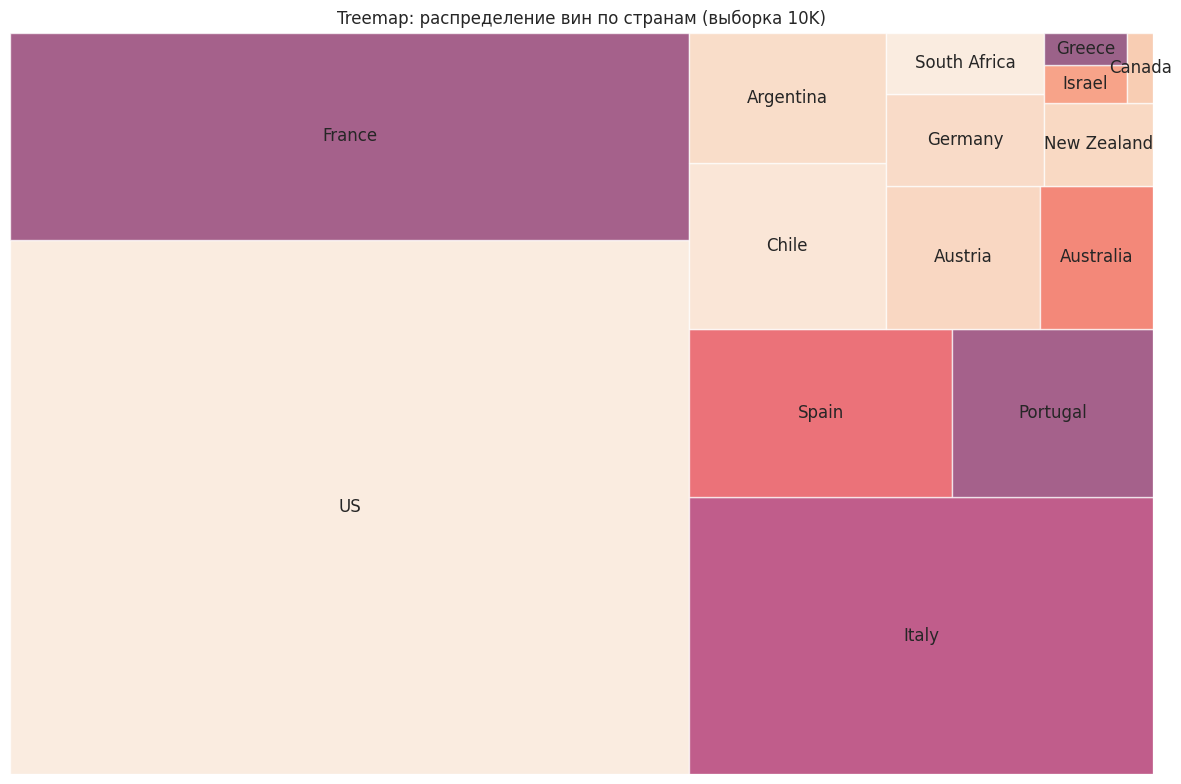

In [54]:
sample_df = df.sample(10000, random_state=26)
country_counts = sample_df['country'].value_counts().head(15)

plt.figure(figsize=(12, 8))
squarify.plot(sizes=country_counts.values, 
              label=country_counts.index, 
              alpha=0.7)
plt.title('Treemap: распределение вин по странам (выборка 10K)')
plt.axis('off')
plt.tight_layout()
plt.show()

* Топ-10 стран по количеству записей

In [55]:
top_countries = df['country'].value_counts().head(10)
print(f"🏆 ТОП-10 СТРАН ПО КОЛИЧЕСТВУ ВИН:")
for i, (country, count) in enumerate(top_countries.items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i}. {country}: {count:,} вин ({percentage:.1f}%)")

🏆 ТОП-10 СТРАН ПО КОЛИЧЕСТВУ ВИН:
1. US: 50,457 вин (42.1%)
2. France: 20,353 вин (17.0%)
3. Italy: 17,940 вин (15.0%)
4. Spain: 6,116 вин (5.1%)
5. Portugal: 5,256 вин (4.4%)
6. Chile: 4,183 вин (3.5%)
7. Argentina: 3,544 вин (3.0%)
8. Austria: 3,034 вин (2.5%)
9. Australia: 2,197 вин (1.8%)
10. Germany: 1,992 вин (1.7%)


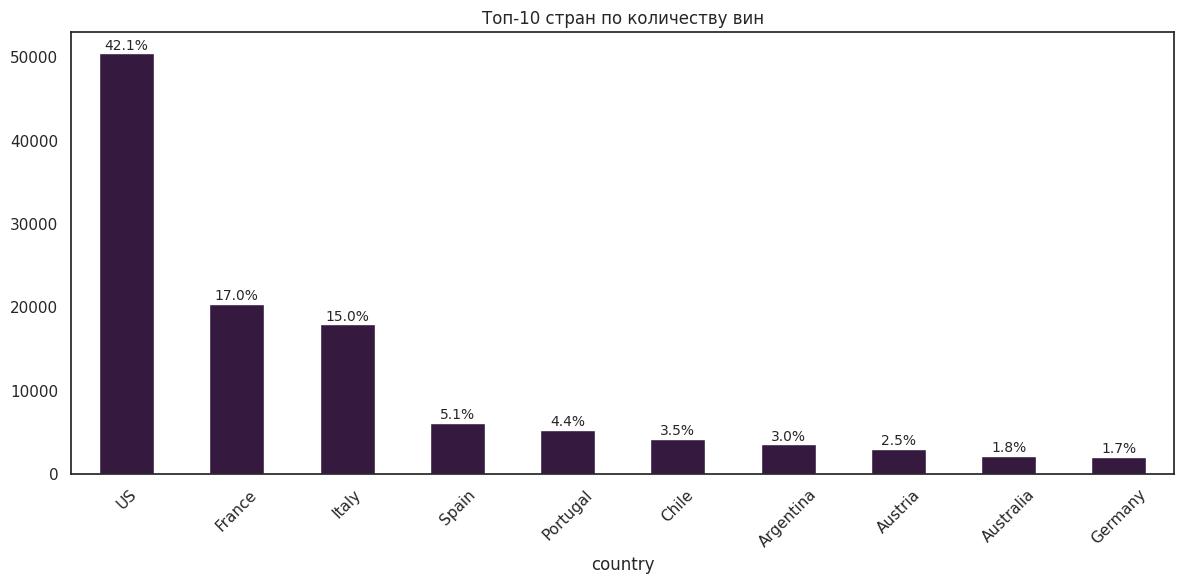

In [56]:
plt.figure(figsize=(12, 6))

top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar')

plt.title('Топ-10 стран по количеству вин')
plt.xticks(rotation=45)

total_wines = len(df)
for i, count in enumerate(top_countries.values):
    percentage = (count / total_wines) * 100
    plt.text(i, count + 100, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

* Доминирующие страны/регионы

In [57]:
total_wines = len(df)
cumulative_percentage = 0
print("80/20")
for i, (country, count) in enumerate(df['country'].value_counts().items(), 1):
    percentage = (count / total_wines) * 100
    cumulative_percentage += percentage
    print(f"{i}. {country}: {percentage:.1f}% (сумма: {cumulative_percentage:.1f}%)")
    if cumulative_percentage >= 80: 
        print(f"⭐ 80% данных покрывают {i} стран")
        break

80/20
1. US: 42.1% (сумма: 42.1%)
2. France: 17.0% (сумма: 59.0%)
3. Italy: 15.0% (сумма: 74.0%)
4. Spain: 5.1% (сумма: 79.1%)
5. Portugal: 4.4% (сумма: 83.5%)
⭐ 80% данных покрывают 5 стран


* Анализ для топ-3 стран

In [58]:
top_3_countries = df['country'].value_counts().head(3).index
for country in top_3_countries:
    country_data = df[df['country'] == country]
    print(f"\n📌 {country}:")
    print(f"   • Регионов: {country_data['province'].nunique()}")
    print(f"   • Винодельческих областей: {country_data['region_1'].nunique()}")
    
    print(f"   Топ-3 региона по количеству вин:")
    top_regions = country_data['province'].value_counts().head(3)
    for region, count in top_regions.items():
        percentage = (count / len(country_data)) * 100
        print(f"      • {region}: {count} вин ({percentage:.1f}%)")


📌 US:
   • Регионов: 27
   • Винодельческих областей: 266
   Топ-3 региона по количеству вин:
      • California: 33656 вин (66.7%)
      • Washington: 7965 вин (15.8%)
      • Oregon: 4929 вин (9.8%)

📌 France:
   • Регионов: 11
   • Винодельческих областей: 392
   Топ-3 региона по количеству вин:
      • Bordeaux: 5556 вин (27.3%)
      • Burgundy: 3683 вин (18.1%)
      • Alsace: 2219 вин (10.9%)

📌 Italy:
   • Регионов: 10
   • Винодельческих областей: 384
   Топ-3 региона по количеству вин:
      • Tuscany: 5391 вин (30.1%)
      • Piedmont: 3441 вин (19.2%)
      • Veneto: 2501 вин (13.9%)


## 2.3. Сорта и типы вин

* Топ-10 популярных сортов винограда

In [59]:
variety_stats = df['variety'].value_counts().head(10)
for category, count in variety_stats.items():
    percentage = (count / len(df)) * 100
    print(f"- {category}: {count:,} вин ({percentage:.2f}%)")

- Pinot Noir: 12,275 вин (10.24%)
- Chardonnay: 10,865 вин (9.06%)
- Cabernet Sauvignon: 8,838 вин (7.37%)
- Red Blend: 8,233 вин (6.86%)
- Bordeaux-style Red Blend: 6,471 вин (5.40%)
- Riesling: 4,772 вин (3.98%)
- Sauvignon Blanc: 4,571 вин (3.81%)
- Syrah: 3,828 вин (3.19%)
- Rosé: 3,219 вин (2.68%)
- Merlot: 2,895 вин (2.41%)


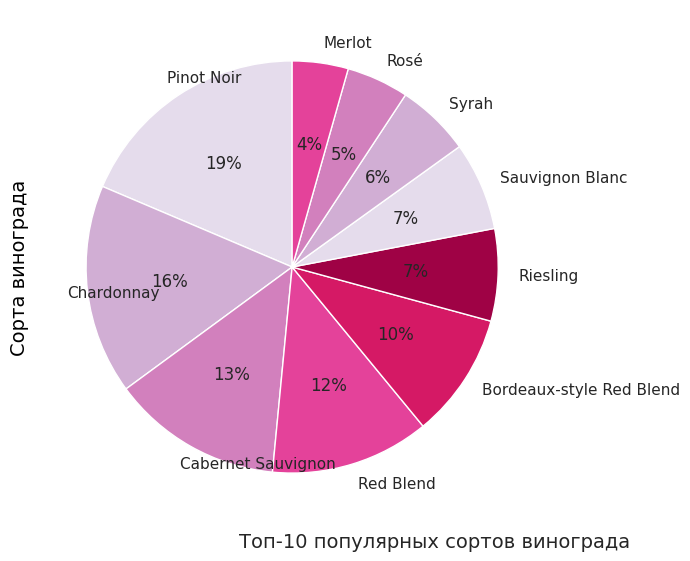

In [60]:
colors = sns.color_palette('PuRd')
variety_stats.plot(
    kind='pie', figsize=[7, 7], colors=colors,
    autopct='%.0f%%',
    counterclock=True, startangle=90,
    center=(1.1, 0))
plt.ylabel('Сорта винограда', fontsize=14, color='k')
plt.figtext(
    0.35, 0.1,
    'Топ-10 популярных сортов винограда',
    fontsize=14)
plt.tight_layout() 
plt.show()

* Распределение цвета по набору данных

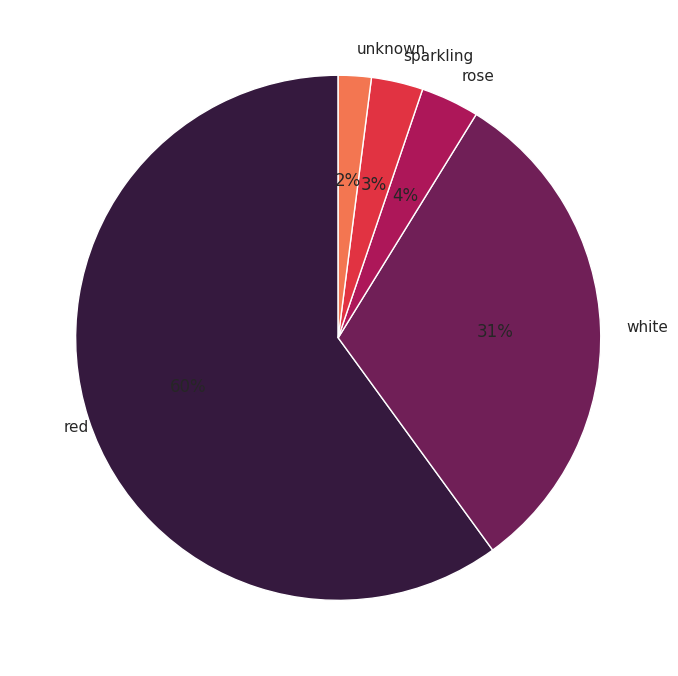

In [61]:
df['color'].value_counts().head(10).plot(
    kind='pie', figsize=[7, 7], 
    autopct='%.0f%%',
    counterclock=True, startangle=90,
    center=(1.1, 0))
plt.ylabel('')
plt.tight_layout() 
plt.show()

* Топ-10 сортов винограда по цвету вина

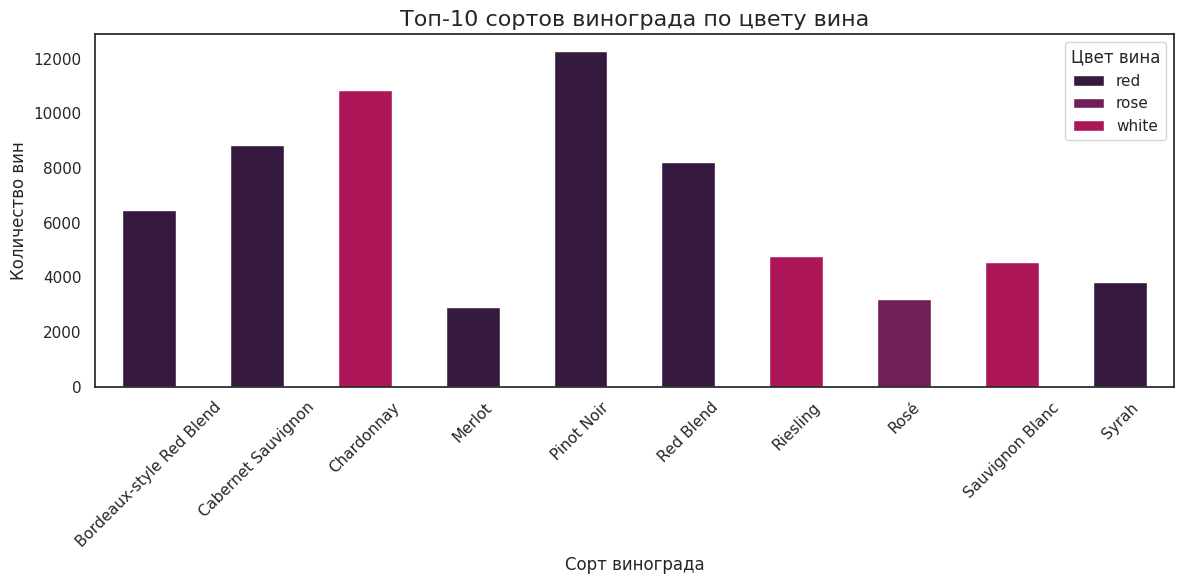

In [62]:
df_top = df[df['variety'].isin(variety_stats.index)]

variety_color_counts = df_top.groupby(['variety', 'color']).size().unstack(fill_value=0)
variety_color_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Топ-10 сортов винограда по цвету вина', fontsize=16)
plt.xlabel('Сорт винограда', fontsize=12)
plt.ylabel('Количество вин', fontsize=12)
plt.legend(title='Цвет вина')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2.4 Анализ возрастных характеристик вина

* Общая статистика по возрасту

In [63]:
print(f"Всего вин с известным возрастом: {df['wine_age'].notna().sum():,}")
print(f"Средний возраст: {df['wine_age'].mean():.1f} лет")
print(f"Медианный возраст: {df['wine_age'].median():.1f} лет")
print(f"Самый молодой: {df['wine_age'].min():.0f} лет")
print(f"Самый старый: {df['wine_age'].max():.0f} лет")

Всего вин с известным возрастом: 115,645
Средний возраст: 6.4 лет
Медианный возраст: 6.0 лет
Самый молодой: 0 лет
Самый старый: 113 лет


* Распределение данных по возрастным категориям:

In [64]:
age_stats = df['age_category'].value_counts().sort_index()
for category, count in age_stats.items():
    percentage = (count / len(df)) * 100
    print(f"- {category}: {count:,} вин ({percentage:.2f}%)")

- Молодое: 26,235 вин (21.88%)
- Выдержанное: 74,539 вин (62.15%)
- Зрелое: 14,623 вин (12.19%)
- Винтаж: 203 вин (0.17%)
- Антиквар: 34 вин (0.03%)


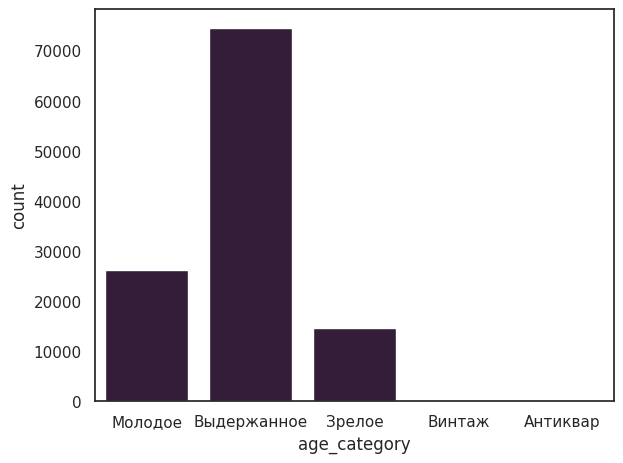

In [65]:
sns.barplot(age_stats)
plt.tight_layout()
plt.show()

* Разбивка количества записей по декадам

In [66]:
df['decade'] = (df['year'] // 10) * 10
df.groupby('decade').agg({
    'price': 'mean',
    'points': 'mean',
    'year': 'count'
}).sort_index()

,price,points,year
decade,,,
1900,40.000000,91.000000,1
1910,19.125000,89.875000,8
1920,21.750000,88.125000,8
1930,737.500000,93.500000,2
1940,459.333333,93.666667,3
1950,429.666667,95.333333,3
1960,335.666667,94.166667,12
1970,164.200000,90.800000,5
1980,112.333333,90.814815,27


## 2.5 Сегментация цен на вино

### Базовый анализ распределения

In [67]:
df.price.describe()

count    119928.000000
mean         35.215521
std          40.840919
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [68]:
print(f"• Средняя цена: {df['price'].mean():.1f} у.е. (медиана: {df['price'].median():.1f} у.е.) → сильный перекос вправо")
print(f"• 50% вин стоят до {df['price'].median():.0f} у.е.")
print(f"• 75% вин стоят до {df['price'].quantile(0.75):.0f} у.е.") 
print(f"• Разброс цен огромен: от {df['price'].min():.0f} у.е. до {df['price'].max():.0f} у.е.")
print(f"• Стандартное отклонение {df['price'].std():.1f} у.е. > среднего значения → высокая вариативность")

• Средняя цена: 35.2 у.е. (медиана: 25.0 у.е.) → сильный перекос вправо
• 50% вин стоят до 25 у.е.
• 75% вин стоят до 42 у.е.
• Разброс цен огромен: от 4 у.е. до 3300 у.е.
• Стандартное отклонение 40.8 у.е. > среднего значения → высокая вариативность


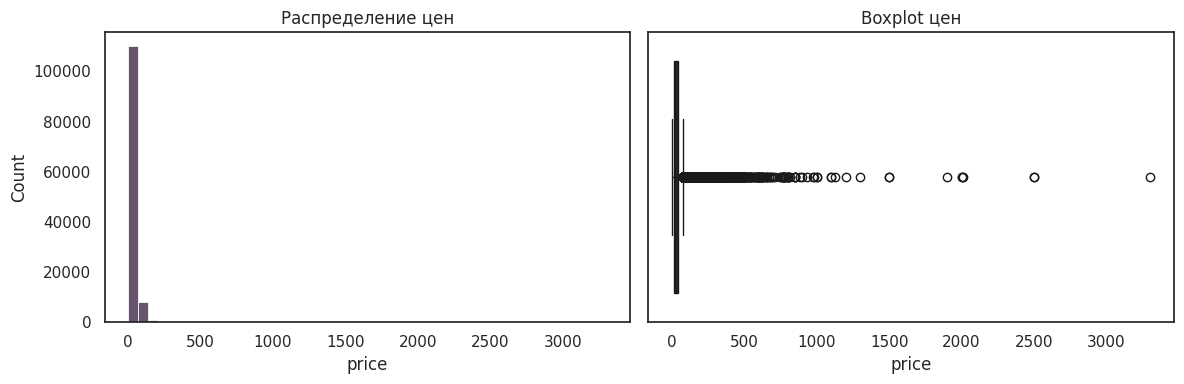

In [69]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50)
plt.title('Распределение цен')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'])
plt.title('Boxplot цен')
plt.tight_layout()
plt.show()

* Анализ экстремальных значений

In [70]:
print(f"• 95-й перцентиль: у.е.{df['price'].quantile(0.95):.0f}")
print(f"• 99-й перцентиль: у.е.{df['price'].quantile(0.99):.0f}")
print(f"• Вин дороже у.е.100: {(df['price'] > 100).sum()} ({(df['price'] > 100).sum()/len(df)*100:.1f}%)")
print(f"• Вин дороже у.е.500: {(df['price'] > 500).sum()} ({(df['price'] > 500).sum()/len(df)*100:.1f}%)")

• 95-й перцентиль: у.е.82
• 99-й перцентиль: у.е.150
• Вин дороже у.е.100: 3234 (2.7%)
• Вин дороже у.е.500: 91 (0.1%)


Для такой выраженной ассиметрии данных использую подходы:

- **Сегментация**: на основе исходных цен для бизнес-интерпретации
- **Визуализация**: цены с логарифмированием для лучшего отображения паттернов

### Метод сегментации цен

**Гибридный подход, сочетающий статистические и бизнес-ориентированные границы:**

- **Статистические сегменты** (по квартилям):
  - Бюджет (0-17 у.е.) - 25% самых дешевых вин
  - Средний- (17-25 у.е.) - следующие 25%  
  - Средний+ (25-42 у.е.) - следующие 25%
  - Премиум (42-76у.е.) - охватывает до 87-го перцентиля

- **Бизнес-сегменты** (ручные границы):
  - Люкс (76-150) - премиальный сегмент
  - Ультра-люкс (150-3300) - эксклюзивные вина

In [71]:
df['price_segment'] = pd.cut(df['price'], 
                           bins=[0, 17, 25, 42, 76, 150, df['price'].max()],
                           labels=['Бюджет', 'Средний-', 'Средний+', 'Премиум', 'Люкс', 'Ультра-люкс'])

segment_stats = df.groupby('price_segment').agg({
    'price': ['count', 'mean', 'min', 'max']
}).round(2)
print(segment_stats)

               price                       
               count    mean    min     max
price_segment                              
Бюджет         30689   13.24    4.0    17.0
Средний-       30574   21.36   17.5    25.0
Средний+       29501   33.46   25.5    42.0
Премиум        22001   55.84   42.5    76.0
Люкс            5971  100.84   77.0   150.0
Ультра-люкс     1192  290.42  151.0  3300.0


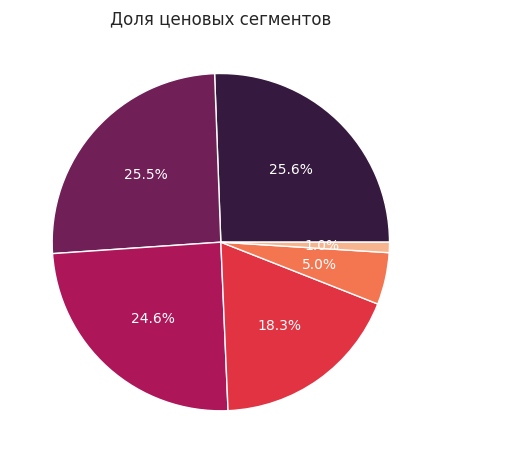

In [72]:
segment_counts = df['price_segment'].value_counts()
plt.pie(
    segment_counts.values, 
    labels=segment_counts.index, 
    autopct='%1.1f%%', 
    textprops={'color': 'white', 'fontsize': 10})
plt.title('Доля ценовых сегментов')
plt.tight_layout()
plt.show()

*  Для визуализации использую логарифмированные цены

**Перевод логарифмированной шкалы:**
- log_price = 3.0 → 20 у.е.
- log_price = 4.0 → 55 у.е.  
- log_price = 5.0 → 150 у.е.
- Разница в 1 единицу = цена отличается в ~2.7 раза

In [73]:
df['log_price'] = np.log1p(df['price'])

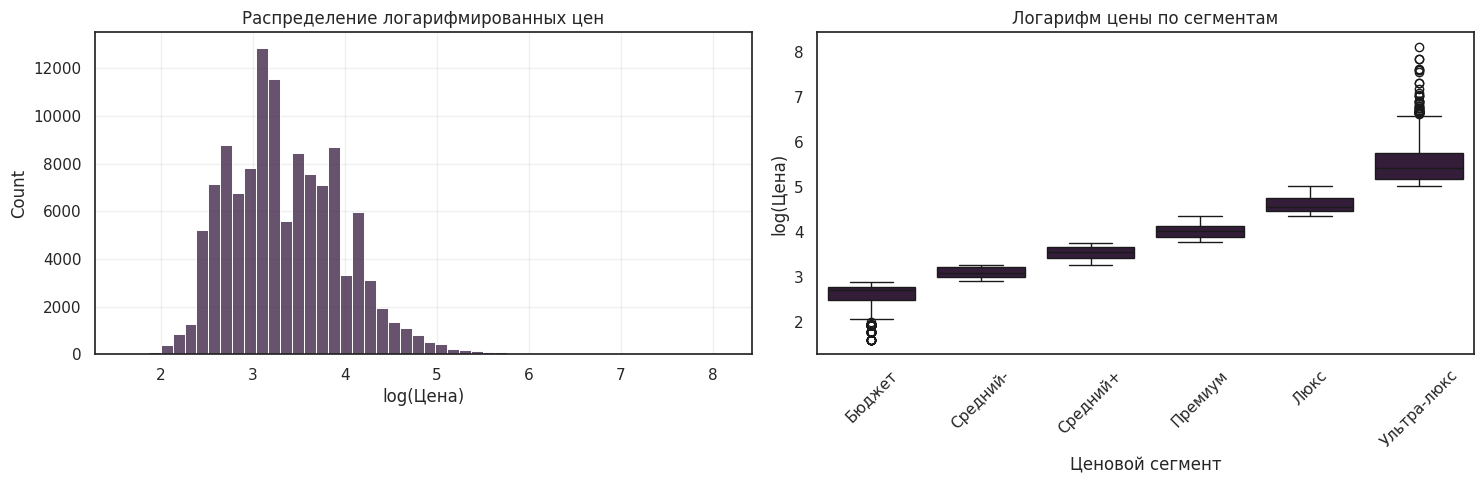

In [74]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['log_price'], bins=50)
plt.title('Распределение логарифмированных цен')
plt.xlabel('log(Цена)')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='price_segment', y='log_price')
plt.title('Логарифм цены по сегментам')
plt.xlabel('Ценовой сегмент')
plt.ylabel('log(Цена)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 2.6 Обзоры, эксперты и рейтинги

### `description` - описания вин 

 * Популярные слова в описаниях вин

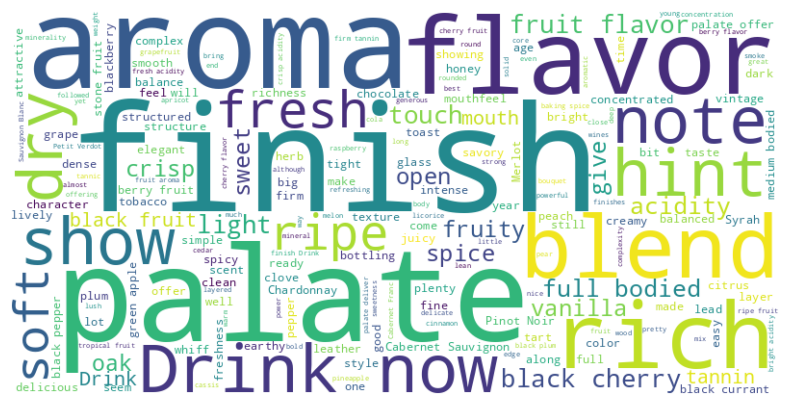

In [126]:
wine_stopwords = {
    'Wine', 'Vineyards', 'Vineyard', 'Estate', 'Reserve', 'Cellars', 
    'Winery', 'Family', 'Series', 'Selection', 'Private', 'Limited',
    'Special', 'Grand', 'Old', 'New', 'French', 'American', 'California',
    'Organic', 'Biodynamic', 'Natural', 'Red', 'White', 'Rose', 'Sparkling', 'nose'
}

stopwords = set(STOPWORDS)
stopwords.update(wine_stopwords)

text = ' '.join(df['description'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      stopwords=stopwords).generate(text)

plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

* Самое короткое описание

In [129]:
df['desc_length'] = df['description'].str.len()

shortest_idx = df['desc_length'].idxmin()
shortest = df.loc[shortest_idx]
print(f"Длина: {shortest['desc_length']} символов")
print(f"Рейтинг: {shortest['points']}")
print(f"Цена: {shortest['price']} у.е.")
print(f"Сорт: {shortest['variety']}")
print(f"Описание: {shortest['description']}")

Длина: 20 символов
Рейтинг: 88
Цена: 24.0 у.е.
Сорт: Chardonnay
Описание: Imported by Kobrand.


* Самое длинное описание

In [128]:
longest_idx = df['desc_length'].idxmax()
longest = df.loc[longest_idx]
print(f"Длина: {longest['desc_length']} символов")
print(f"Рейтинг: {shortest['points']}")
print(f"Цена: {longest['price']} у.е.")
print(f"Сорт: {longest['variety']}")
print(f"Описание: {longest['description']}...")  

Длина: 829 символов
Рейтинг: 88
Цена: 45.0 у.е.
Сорт: Red Blend
Описание: Dark, dusty, strongly scented with barrel toast, coffee grounds and incense, this is the most substantial and complete version to date. Balancing cherry and plum fruit against the pretty barrel-infused tannins, it glides gracefully across the palate into a seamless finish.   Saggi is the Long Shadows collaboration with Tuscany's Ambrogio and Giovanni Folonari. the blend in 2007 is 43% Sangiovese, 36% Cabernet Sauvignon and 21% Syrah. With each new vintage, the percentage of Sangiovese climbs, putting more Tuscany in this new world super-Tuscan wine. Dark, dusty, strongly scented with barrel toast, coffee grounds and incense, this is the most substantial and complete version to date. Balancing cherry and plum fruit against the pretty barrel-infused tannins, it glides gracefully across the palate into a seamless finish....


* Анализ тональности (sentiment) по ценовым сегментам

In [130]:
df['sentiment'] = df['description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

expensive_sentiment = df[df['price'] > df['price'].quantile(0.8)]['sentiment'].mean()
cheap_sentiment = df[df['price'] < df['price'].quantile(0.2)]['sentiment'].mean()

print(f"Тональность дорогих вин: {expensive_sentiment:.2f}")
print(f"Тональность дешевых вин: {cheap_sentiment:.2f}")

Тональность дорогих вин: 0.15
Тональность дешевых вин: 0.16


Дешевые вина имеют чуть более позитивные описания, чем дорогие. Возможно дорогие вина описывают более сдержанно, а дешёвые приукрашивают.  
Выраженных отличий нет.

* Визуализация распределения тональности  
Интерпретация:
    * \> 0.2 - явно позитивный тон
    * 0.05 - 0.2 - слабо позитивный тон
    * -0.05 - 0.05 - нейтральный тон
    * < -0.05 - негативный тон

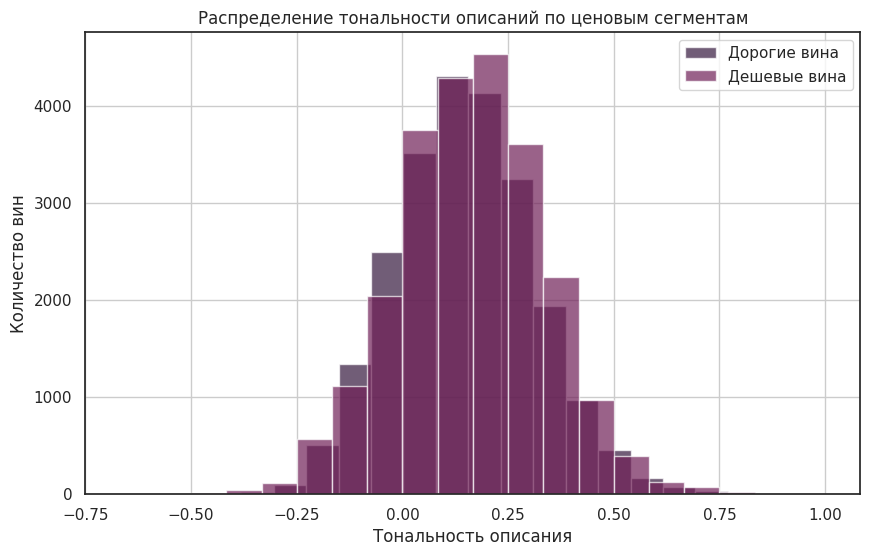

In [131]:
plt.figure(figsize=(10, 6))
df[df['price'] > df['price'].quantile(0.8)]['sentiment'].hist(alpha=0.7, label='Дорогие вина', bins=20)
df[df['price'] < df['price'].quantile(0.2)]['sentiment'].hist(alpha=0.7, label='Дешевые вина', bins=20)
plt.xlabel('Тональность описания')
plt.ylabel('Количество вин')
plt.legend()
plt.title('Распределение тональности описаний по ценовым сегментам')
plt.show()

In [132]:
print("Статистика тональности по всем винам:")
print(f"Средняя тональность: {df['sentiment'].mean():.3f}")
print(f"Стандартное отклонение: {df['sentiment'].std():.3f}")
print(f"Минимум: {df['sentiment'].min():.3f}")
print(f"Максимум: {df['sentiment'].max():.3f}")

Статистика тональности по всем винам:
Средняя тональность: 0.157
Стандартное отклонение: 0.170
Минимум: -0.800
Максимум: 1.000


Большинство описаний находятся в положительной зоне.  
Стандартное отклонение 0.170 - относительно небольшой разброс. Описания написаны в схожем стиле, нет резких контрастов.

In [133]:
most_positive_idx = df['sentiment'].idxmax()
most_positive = df.loc[most_positive_idx]
print("🎉 САМОЕ ПОЗИТИВНОЕ ОПИСАНИЕ:")
print(f"Тональность: {most_positive['sentiment']:.3f}")
print(f"Рейтинг: {shortest['points']}")
print(f"Цена: {most_positive['price']} у.е.")
print(f"Сорт: {most_positive['variety']}")
print(f"Описание: {most_positive['description']}")
print("-" * 80)

most_negative_idx = df['sentiment'].idxmin()
most_negative = df.loc[most_negative_idx]
print("😞 САМОЕ НЕГАТИВНОЕ ОПИСАНИЕ:")
print(f"Тональность: {most_negative['sentiment']:.3f}")
print(f"Рейтинг: {shortest['points']}")
print(f"Цена: {most_negative['price']} у.е.")
print(f"Сорт: {most_negative['variety']}")
print(f"Описание: {most_negative['description']}")
print("-" * 80)

🎉 САМОЕ ПОЗИТИВНОЕ ОПИСАНИЕ:
Тональность: 1.000
Рейтинг: 88
Цена: 30.0 у.е.
Сорт: Rosé
Описание: Produced from organic grapes, the wine is ripe and packed with fruit. It has a delicious line of acidity, as well as weight and peach and red-fruit flavors. The acidity keeps the exuberance in check. Drink now.
--------------------------------------------------------------------------------
😞 САМОЕ НЕГАТИВНОЕ ОПИСАНИЕ:
Тональность: -0.800
Рейтинг: 88
Цена: 25.0 у.е.
Сорт: Cabernet Sauvignon
Описание: Touches of soy, cedar and smoked meat enhance the base of blueberry on the nose of this bottling from a vineyard in the geographic heart of the Santa Ynez Valley. Mocha and blackberry flavors show on the sip, where an even-keeled acidity holds it all together.
--------------------------------------------------------------------------------


Вероятно TextBlob плохо работает с винными терминами на английском.  
Слова "soy" (соя), "cedar" (кедр), "smoked meat" (копченое мясо), "mocha" (мокко), "acidity" (кислотность) алгоритм воспринимает как негативные.  
В контексте вин эти термины нейтральны или даже позитивны - они описывают сложный букет.

* Статистика по ключевым вкусовым профилям вин

In [149]:
taste_words = ['fruity', 'oaky', 'spicy', 'herbal', 'mineral', 'earthy', 
               'citrus', 'berry', 'chocolate', 'vanilla', 'caramel']

results = []
total_wines = len(df['description'].dropna())

for word in taste_words:
    count = df['description'].str.contains(word, case=False, na=False).sum()
    percentage = (count / total_wines) * 100
    results.append((word, count, percentage))

results.sort(key=lambda x: x[1], reverse=True)

for word, count, percentage in results:
    print(f" {word:<10} {count:>5} раз ({percentage:>.1f}%)")

 berry      38218 раз (31.9%)
 citrus     11353 раз (9.5%)
 mineral    10263 раз (8.6%)
 vanilla     9820 раз (8.2%)
 fruity      8675 раз (7.2%)
 chocolate   7869 раз (6.6%)
 spicy       6470 раз (5.4%)
 herbal      5189 раз (4.3%)
 earthy      4612 раз (3.8%)
 caramel     2767 раз (2.3%)
 oaky        2530 раз (2.1%)


### `taster_name`, `taster_twitter_handle` - авторы обзоров 

* Статистика по обзорам

In [156]:
print(f"- Всего обзоров: {len(df):,}")
print(f"- Обзоров с указанием эксперта: {df['taster_name'].notna().sum():,} ({df['taster_name'].notna().mean()*100:.1f}%)")
print(f"- Обзоров с Twitter эксперта: {df['taster_twitter_handle'].notna().sum():,} ({df['taster_twitter_handle'].notna().mean()*100:.1f}%)")

- Всего обзоров: 119,928
- Обзоров с указанием эксперта: 95,012 (79.2%)
- Обзоров с Twitter эксперта: 90,483 (75.4%)


* Распределение обзоров по экспертам

In [206]:
top_tasters = df['taster_name'].value_counts().head()
print("🏆 Самые продуктивные эксперты:")
for taster, count in top_tasters.items():
    print(f"  {taster}: {count:,} обзоров")

🏆 Самые продуктивные эксперты:
  Roger Voss: 23,558 обзоров
  Michael Schachner: 14,039 обзоров
  Kerin O’Keefe: 9,697 обзоров
  Paul Gregutt: 8,867 обзоров
  Virginie Boone: 8,708 обзоров


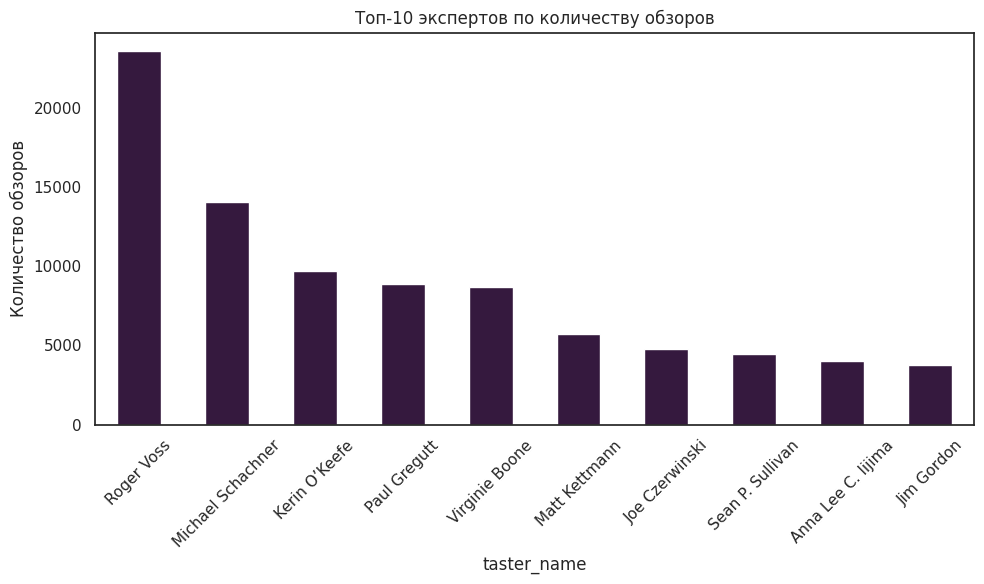

In [168]:
plt.figure(figsize=(10, 6))
df['taster_name'].value_counts().head(10).plot(kind='bar')
plt.title('Топ-10 экспертов по количеству обзоров')
plt.ylabel('Количество обзоров')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [201]:
print(f"Записей с Twitter, но без имени эксперта: {len(df[df['taster_twitter_handle'].notna() & df['taster_name'].isna()])}")
print(f"\nЗаписей с именем эксперта, но без Twitter: {len(df[df['taster_name'].notna() & df['taster_twitter_handle'].isna()])}")

Записей с Twitter, но без имени эксперта: 0

Записей с именем эксперта, но без Twitter: 4529


* Самые активные эксперты с Twitter

In [185]:
twitter_stats = df.groupby(['taster_name', 'taster_twitter_handle']).size().reset_index(name='mentions')
twitter_stats = twitter_stats.sort_values('mentions', ascending=False).head(10)

for i, (_, row) in enumerate(twitter_stats.iterrows(), 1):
    print(f"{i:2}. {row['taster_name']:20} {row['taster_twitter_handle']:20} {row['mentions']:4} упоминаний")

 1. Roger Voss           @vossroger           23558 упоминаний
 2. Michael Schachner    @wineschach          14039 упоминаний
 3. Kerin O’Keefe        @kerinokeefe         9697 упоминаний
 4. Paul Gregutt         @paulgwine           8867 упоминаний
 5. Virginie Boone       @vboone              8708 упоминаний
 6. Matt Kettmann        @mattkettmann        5730 упоминаний
 7. Joe Czerwinski       @JoeCz               4765 упоминаний
 8. Sean P. Sullivan     @wawinereport        4461 упоминаний
 9. Jim Gordon           @gordone_cellars     3766 упоминаний
10. Anne Krebiehl MW     @AnneInVino          3282 упоминаний


* Средняя цена вин по экспертам

In [218]:
expert_price_preference = df.groupby('taster_name')['price'].agg(['mean', 'median', 'count'])
expert_price_preference

,mean,median,count
taster_name,,,
Alexander Peartree,28.900783,25.0,383
Anna Lee C. Iijima,30.237117,22.0,4017
Anne Krebiehl MW,31.353900,25.0,3282
Carrie Dykes,30.356589,28.0,129
Christina Pickard,29.333333,28.5,6
Fiona Adams,32.041667,27.5,24
Jeff Jenssen,22.281928,16.0,415
Jim Gordon,26.987387,23.0,3766
Joe Czerwinski,35.255509,22.0,4765


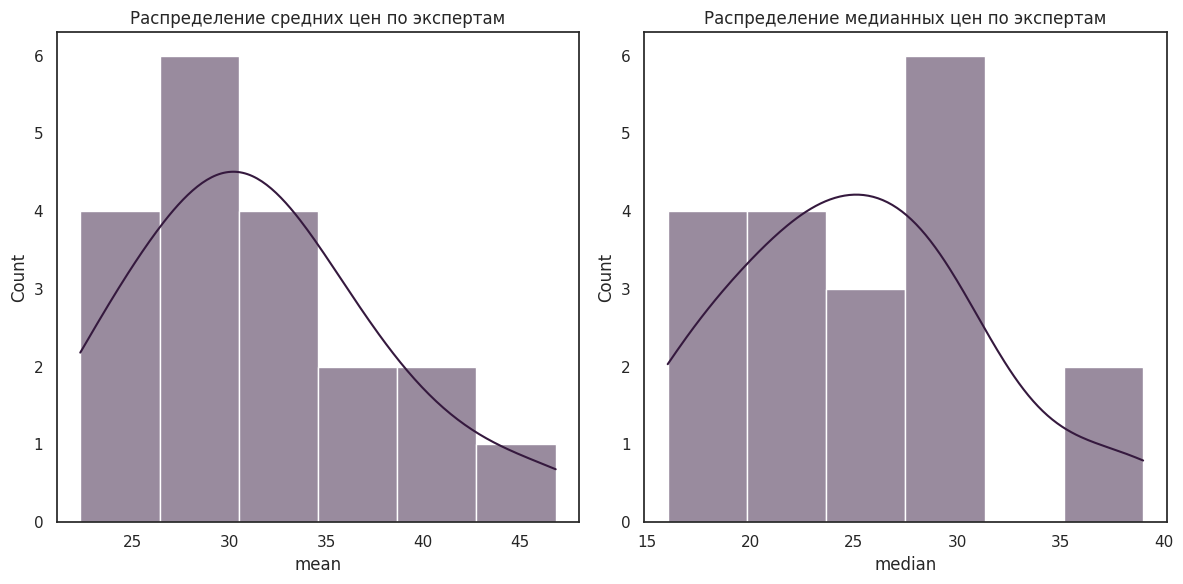

In [224]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
sns.histplot(data=expert_price_preference, x="mean", kde=True)
plt.title('Распределение средних цен по экспертам')

plt.subplot(1, 2, 2) 
sns.histplot(data=expert_price_preference, x="median", kde=True)
plt.title('Распределение медианных цен по экспертам')

plt.tight_layout()
plt.show()

Нет специализации по цене - каждый эксперт оценивает вина разных ценовых категорий, нет явного смещения в дорогой/дешевый сегмент

* Pазброс цен у каждого эксперта

In [328]:
expert_price_range = df.groupby('taster_name')['price'].agg(['min', 'max', 'std'])
print("Разброс цен по экспертам:")
print(expert_price_range.sort_values('std', ascending=False))

Разброс цен по экспертам:
                     min     max        std
taster_name                                
Roger Voss           5.0  3300.0  66.286927
Joe Czerwinski       5.0   850.0  45.131964
Anna Lee C. Iijima   4.0   775.0  41.816950
Kerin O’Keefe        6.0   800.0  38.220533
Virginie Boone       7.0   625.0  33.193314
Matt Kettmann        7.0  2013.0  32.971745
Michael Schachner    4.0   770.0  28.816637
Anne Krebiehl MW    10.0  1100.0  25.477657
Jeff Jenssen         6.0   320.0  23.135497
Lauren Buzzeo        5.0   350.0  20.791263
Sean P. Sullivan     6.0   240.0  20.187548
Paul Gregutt         5.0   275.0  19.058782
Jim Gordon           4.0   220.0  17.705925
Susan Kostrzewa      7.0   320.0  17.479448
Alexander Peartree  11.0   250.0  16.985228
Fiona Adams         17.0    80.0  16.861273
Mike DeSimone        9.0   120.0  16.830712
Christina Pickard   19.0    50.0  11.165423
Carrie Dykes        14.0    75.0  10.872700


* Cтрогие/лояльные эксперты (анализ стиля оценивания)

In [270]:
expert_range = df.groupby('taster_name')['points'].agg(['min', 'max', 'std'])
print(expert_range.sort_values('std', ascending=False))

                    min  max       std
taster_name                           
Christina Pickard    82   93  3.600926
Roger Voss           80  100  3.083474
Michael Schachner    80   98  3.068086
Virginie Boone       80   99  3.054967
Joe Czerwinski       80  100  2.903511
Paul Gregutt         80  100  2.852419
Jim Gordon           80   97  2.745278
Anna Lee C. Iijima   80   98  2.610994
Matt Kettmann        81   97  2.602762
Lauren Buzzeo        81   95  2.561519
Kerin O’Keefe        80  100  2.529686
Sean P. Sullivan     80   97  2.513158
Anne Krebiehl MW     80   97  2.426018
Susan Kostrzewa      80   94  2.391469
Jeff Jenssen         82   97  2.096358
Carrie Dykes         81   92  2.026382
Mike DeSimone        82   94  2.018577
Alexander Peartree   80   91  1.941269
Fiona Adams          82   91  1.775436


In [295]:
min_max_points = expert_range['max'].min()
print(f"Самый низкий 'высокий' балл: {min_max_points}")

experts_with_min_max = expert_range[expert_range['max'] == min_max_points]
print("Эксперты:")
print(experts_with_min_max.index.tolist())

Самый низкий 'высокий' балл: 91
Эксперты:
['Alexander Peartree', 'Fiona Adams']


In [296]:
print("Эксперты, выставлявшие 100 баллов:")
print(df[df['points'] == 100]['taster_name'].value_counts())

Эксперты, выставлявшие 100 баллов:
taster_name
Roger Voss        10
Paul Gregutt       2
Joe Czerwinski     1
Kerin O’Keefe      1
Name: count, dtype: int64


In [273]:
print("Используют весь диапазон:")
for name in expert_range.head(3).index:
    data = expert_range.loc[name]
    print(f"   {name:20} std: {data['std']:4.2f} | диапазон: {data['min']}-{data['max']}")

print("\nУзкий диапазон оценок:")
for name in expert_range.tail(3).index:
    data = expert_range.loc[name]
    print(f"   {name:20} std: {data['std']:4.2f} | диапазон: {data['min']}-{data['max']}")

Используют весь диапазон:
   Alexander Peartree   std: 1.94 | диапазон: 80.0-91.0
   Anna Lee C. Iijima   std: 2.61 | диапазон: 80.0-98.0
   Anne Krebiehl MW     std: 2.43 | диапазон: 80.0-97.0

Узкий диапазон оценок:
   Sean P. Sullivan     std: 2.51 | диапазон: 80.0-97.0
   Susan Kostrzewa      std: 2.39 | диапазон: 80.0-94.0
   Virginie Boone       std: 3.05 | диапазон: 80.0-99.0


* Корреляция оценок экспертов, которые оценивали одни и те же вина

In [329]:
multi_expert = df.groupby('title').filter(lambda x: x['taster_name'].nunique() > 1)
print(f"Вин с несколькими экспертами: {multi_expert['title'].nunique()}")

Вин с несколькими экспертами: 46


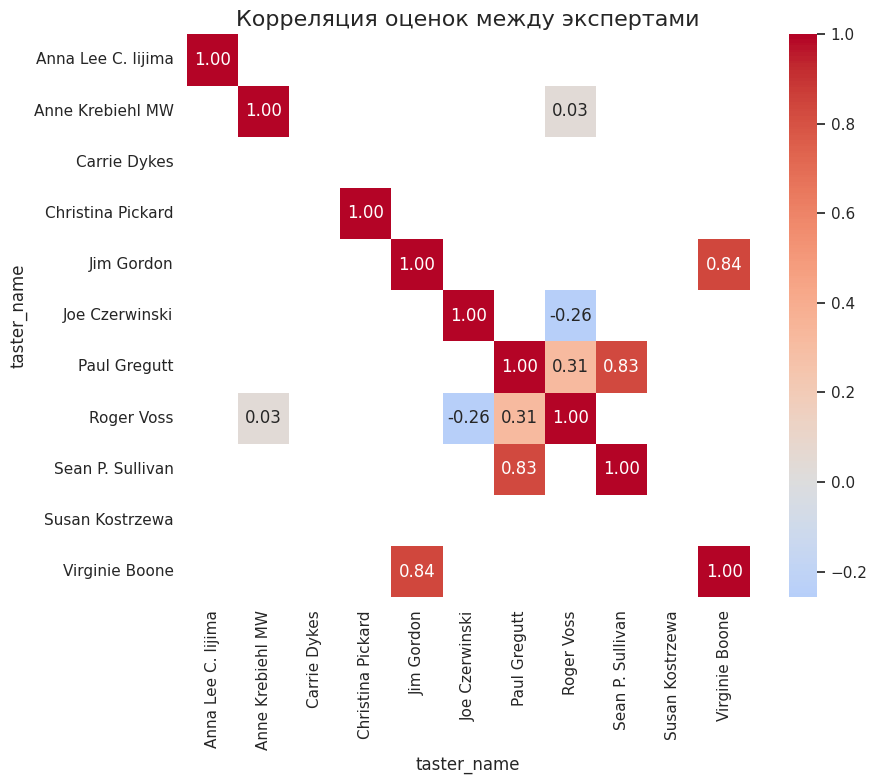

In [331]:
expert_ratings = multi_expert.pivot_table(index='title', 
                               columns='taster_name', 
                               values='points', 
                               aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True)
plt.title('Корреляция оценок между экспертами', fontsize=16)
plt.tight_layout()
plt.show()

In [346]:
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Убираем зеркальные пары и NaN
unique_pairs = {}
for pair, corr_value in corr_pairs.items():
    if pd.notna(corr_value):  # Фильтруем NaN
        expert1, expert2 = pair
        sorted_pair = tuple(sorted([expert1, expert2]))
        if sorted_pair not in unique_pairs:
            unique_pairs[sorted_pair] = corr_value

unique_corr_series = pd.Series(unique_pairs)

print(f"📈 ОБЩАЯ СТАТИСТИКА:")
print(f"Уникальных пар экспертов: {len(unique_corr_series)}")
print(f"Средняя корреляция: {unique_corr_series.mean():.3f}")
print(f"Медианная корреляция: {unique_corr_series.median():.3f}")
print(f"Количество сильных связей (>0.7): {(unique_corr_series > 0.7).sum()}")
print(f"Количество слабых связей (<0.3): {(unique_corr_series < 0.3).sum()}")

# Все пары отсортированные по силе корреляции
print(f"\n🎯 ВСЕ ПАРЫ ЭКСПЕРТОВ (отсортировано по силе корреляции):")
sorted_pairs = unique_corr_series.sort_values(ascending=False)

for pair, corr_value in sorted_pairs.items():
    expert1, expert2 = pair
    
    # Определяем силу связи
    if corr_value > 0.7:
        strength = "очень сильная"
    elif corr_value > 0.5:
        strength = "сильная"
    elif corr_value > 0.3:
        strength = "умеренная" 
    elif corr_value > 0.1:
        strength = "слабая"
    elif corr_value > -0.1:
        strength = "очень слабая"
    elif corr_value > -0.3:
        strength = "слабая отрицательная"
    else:
        strength = "умеренная отрицательная"
    
    print(f"• {expert1:20} + {expert2:20}: {corr_value:.3f} - {strength}")

📈 ОБЩАЯ СТАТИСТИКА:
Уникальных пар экспертов: 5
Средняя корреляция: 0.352
Медианная корреляция: 0.314
Количество сильных связей (>0.7): 2
Количество слабых связей (<0.3): 2

🎯 ВСЕ ПАРЫ ЭКСПЕРТОВ (отсортировано по силе корреляции):
• Jim Gordon           + Virginie Boone      : 0.841 - очень сильная
• Paul Gregutt         + Sean P. Sullivan    : 0.831 - очень сильная
• Paul Gregutt         + Roger Voss          : 0.314 - умеренная
• Anne Krebiehl MW     + Roger Voss          : 0.033 - очень слабая
• Joe Czerwinski       + Roger Voss          : -0.257 - слабая отрицательная


* Предпочтения по цветам

In [324]:
expert_color = pd.crosstab(df['taster_name'], df['color'])
expert_color

color,red,rose,sparkling,unknown,white
taster_name,,,,,
Alexander Peartree,195,16,14,2,156
Anna Lee C. Iijima,901,129,147,67,2773
Anne Krebiehl MW,448,53,235,146,2400
Carrie Dykes,72,6,0,2,49
Christina Pickard,3,0,1,0,2
Fiona Adams,16,0,6,0,2
Jeff Jenssen,174,9,11,44,177
Jim Gordon,2516,113,94,40,1003
Joe Czerwinski,2362,234,67,41,2061


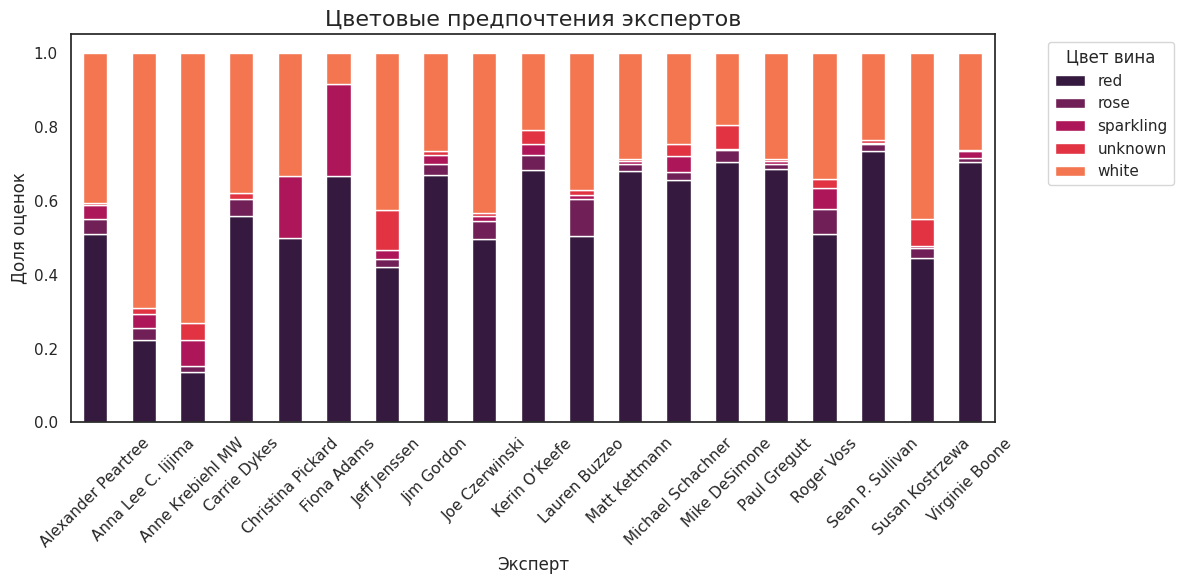

In [261]:
expert_color_pct = expert_color.div(expert_color.sum(axis=1), axis=0)

expert_color_pct.plot(kind='bar', 
                      stacked=True, 
                      figsize=(12, 6))

plt.title('Цветовые предпочтения экспертов', fontsize=16)
plt.xlabel('Эксперт')
plt.ylabel('Доля оценок')
plt.legend(title='Цвет вина', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Специализация экспертов по странам (топ-15 стран по количеству оценок)

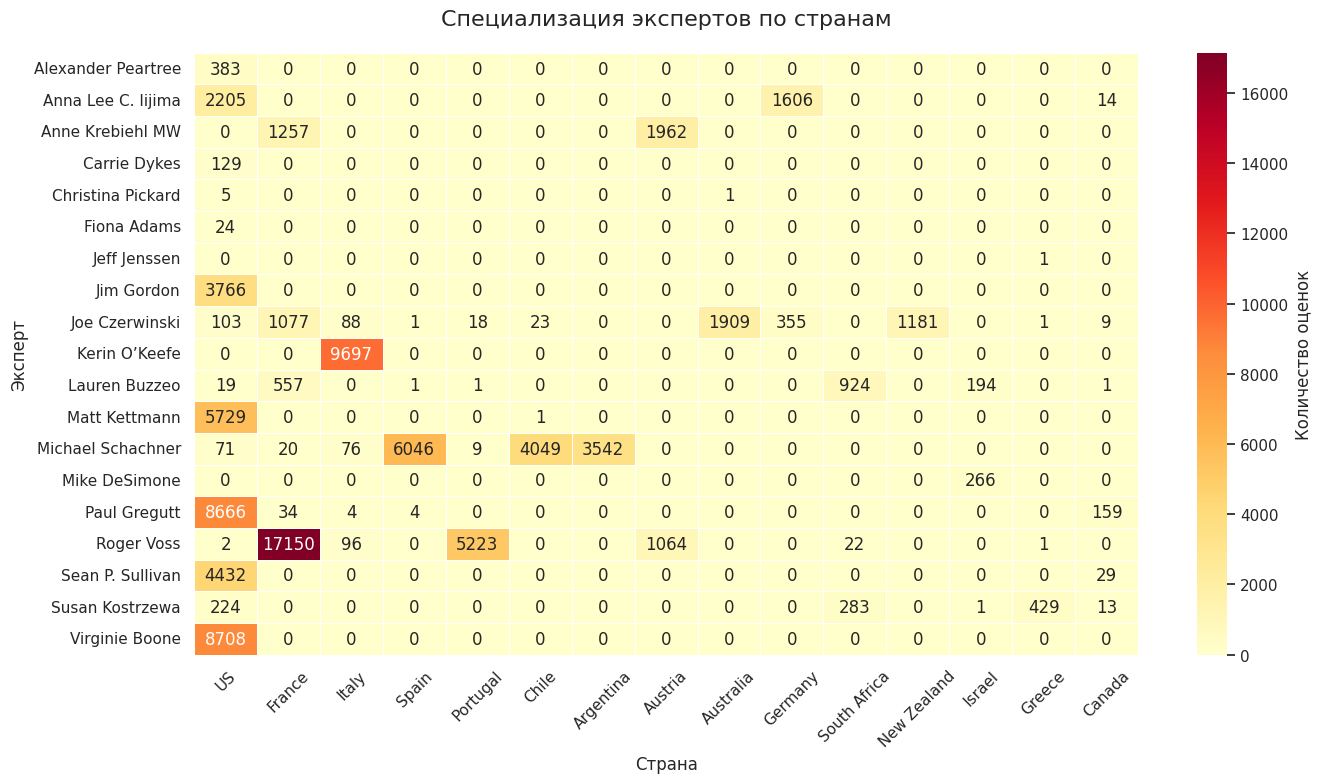

In [264]:
expert_country = pd.crosstab(df['taster_name'], df['country'])

top_countries = df['country'].value_counts().head(15).index
expert_country = expert_country[top_countries]

# Строим heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(expert_country, 
            annot=True, 
            fmt='d',
            cmap='YlOrRd',
            linewidths=0.5,
            cbar_kws={'label': 'Количество оценок'})

plt.title('Специализация экспертов по странам', fontsize=16, pad=20)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Эксперт', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### `points` оценки вин

In [363]:
df.points.describe()

count    119928.000000
mean         88.442149
std           3.093287
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [364]:
print(f"• Средний рейтинг: {df['points'].mean():.1f} баллов (медиана: {df['points'].median():.1f} баллов)")
print(f"• 50% вин имеют рейтинг до {df['points'].median():.0f} баллов")
print(f"• 75% вин имеют рейтинг до {df['points'].quantile(0.75):.0f} баллов") 
print(f"• Разброс рейтингов: от {df['points'].min():.0f} до {df['points'].max():.0f} баллов")
print(f"• Стандартное отклонение {df['points'].std():.1f} баллов → {'высокая' if df['points'].std() > df['points'].mean() * 0.3 else 'умеренная'} вариативность")

• Средний рейтинг: 88.4 баллов (медиана: 88.0 баллов)
• 50% вин имеют рейтинг до 88 баллов
• 75% вин имеют рейтинг до 91 баллов
• Разброс рейтингов: от 80 до 100 баллов
• Стандартное отклонение 3.1 баллов → умеренная вариативность


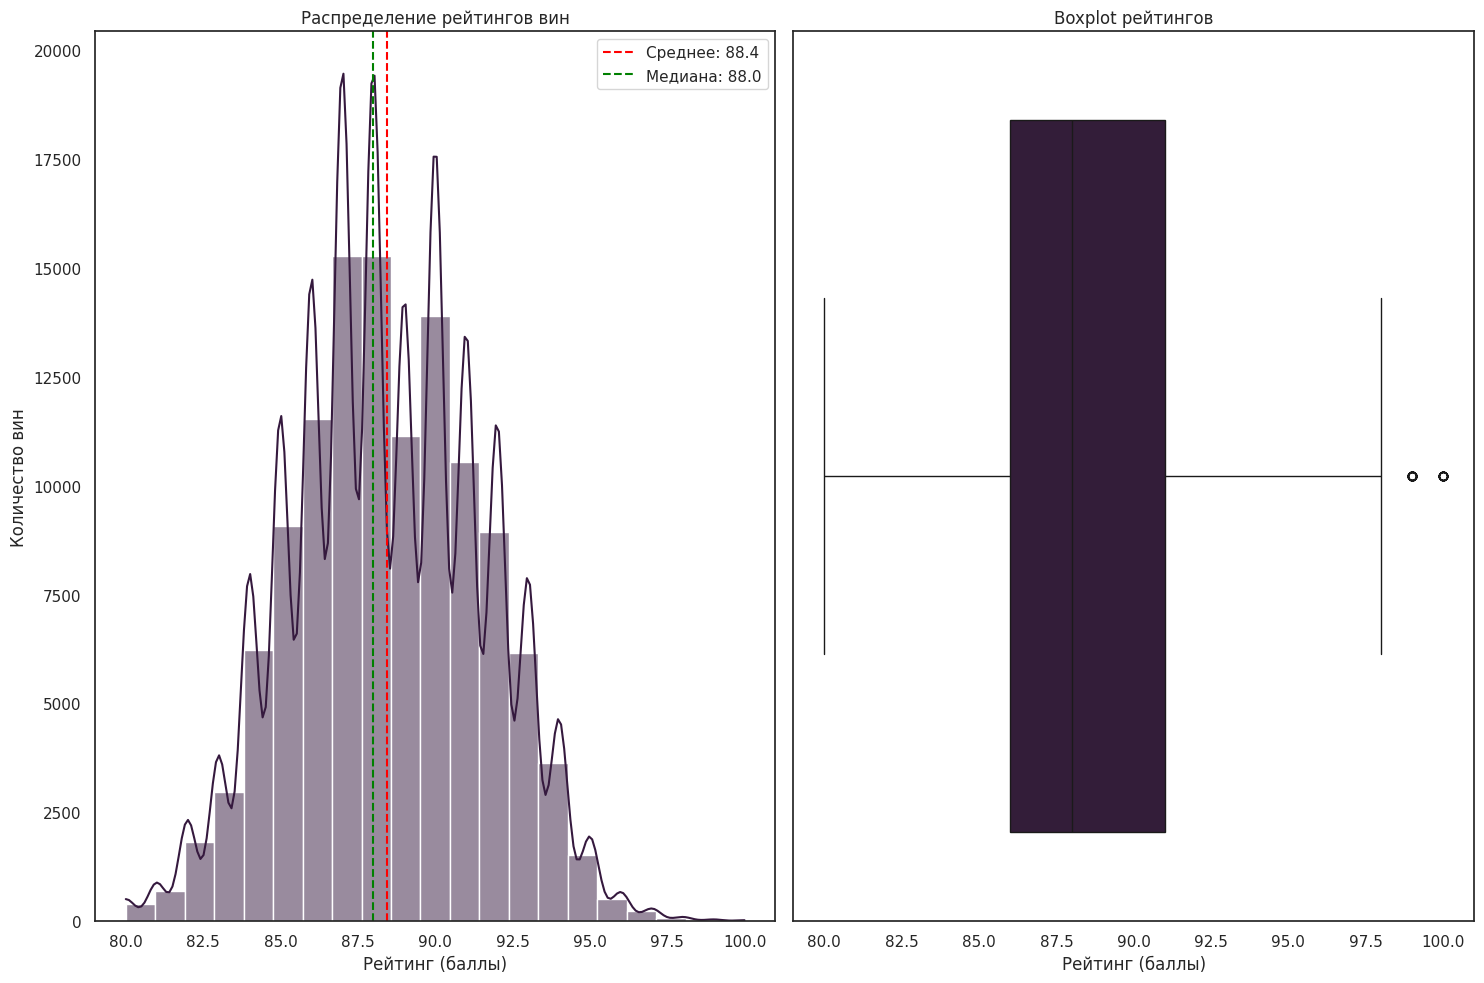

In [365]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 10))

# Гистограмма
sns.histplot(data=df, x='points', bins=21, kde=True, ax=ax1)
ax1.axvline(df['points'].mean(), color='red', linestyle='--', label=f'Среднее: {df["points"].mean():.1f}')
ax1.axvline(df['points'].median(), color='green', linestyle='--', label=f'Медиана: {df["points"].median():.1f}')
ax1.set_xlabel('Рейтинг (баллы)')
ax1.set_ylabel('Количество вин')
ax1.set_title('Распределение рейтингов вин')
ax1.legend()

# Boxplot
sns.boxplot(data=df, x='points', ax=ax2)
ax2.set_xlabel('Рейтинг (баллы)')
ax2.set_title('Boxplot рейтингов')

plt.tight_layout()
plt.show()

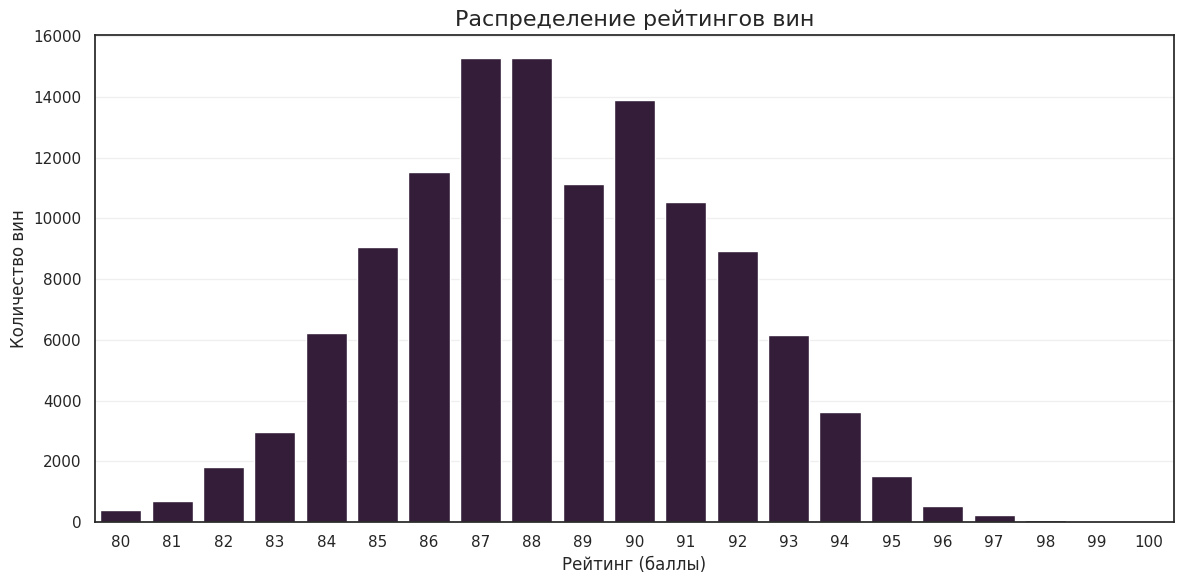

In [362]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='points', order=sorted(df['points'].unique()))
plt.title('Распределение рейтингов вин', fontsize=16)
plt.xlabel('Рейтинг (баллы)')
plt.ylabel('Количество вин')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

###  Сорта вина лидируют по рейтингам.</br>
Топ-5 вин с наибольшими рейтингами изготовлены из следующих сортов винограда: Мерло, Шардоне,  купаж Каберне, португальский красный купаж и и красный бордоский купаж.

In [ ]:
df[['variety', 'province', 'country', 'points', 'price']].sort_values(
    by='points', axis=0, ascending=False).head(5)

Вина с максимальным рейтингом (100 балов):
- из винограда сотра Мерло, произведённое в Италии, Тоскана, стоимостью 460 у.е.
- из винограда сотра Шардоне, произведённое во Франции, Шампань, стоимостью 1400 у.е.
- из винограда купажа Каберне, произведённое в США, Калифорния, стоимостью 245 у.е.

### Построить график «ящик с усами» по рейтингам, выполнив категоризацию по странам, по сортам вина.

#### Постороим зависимость рейтинга от страны-производителя вина.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 15))
sns.boxplot(y='country', x='points', data=df, palette='rocket')
plt.xlabel('Стоимости', fontsize=14, color='k')
plt.ylabel('Страны', fontsize=14, color='k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(
    0.3, 0.06,
    'Диаграмма размаха рейтинга с разбивкой по странам',
    fontsize=14)
plt.tight_layout() 
plt.show()

Визуально самые высокие средние рейтинги у Франции и Австрии.
Визуально самые низкие средние рейтинги у Израиля, Бразилии, Южной Кореи и Монтенегро.

#### Постороим зависимость рейтинга от сорта винограда.

In [ ]:
df['variety'].nunique()

В наборе данных большое количество уникальных значений сортов винограда (398 шт).<br>
Для лучшей визуализации построим диаграму зависимости рейтинга от сорта винограда, топ-20 самых распространённых сортов. 

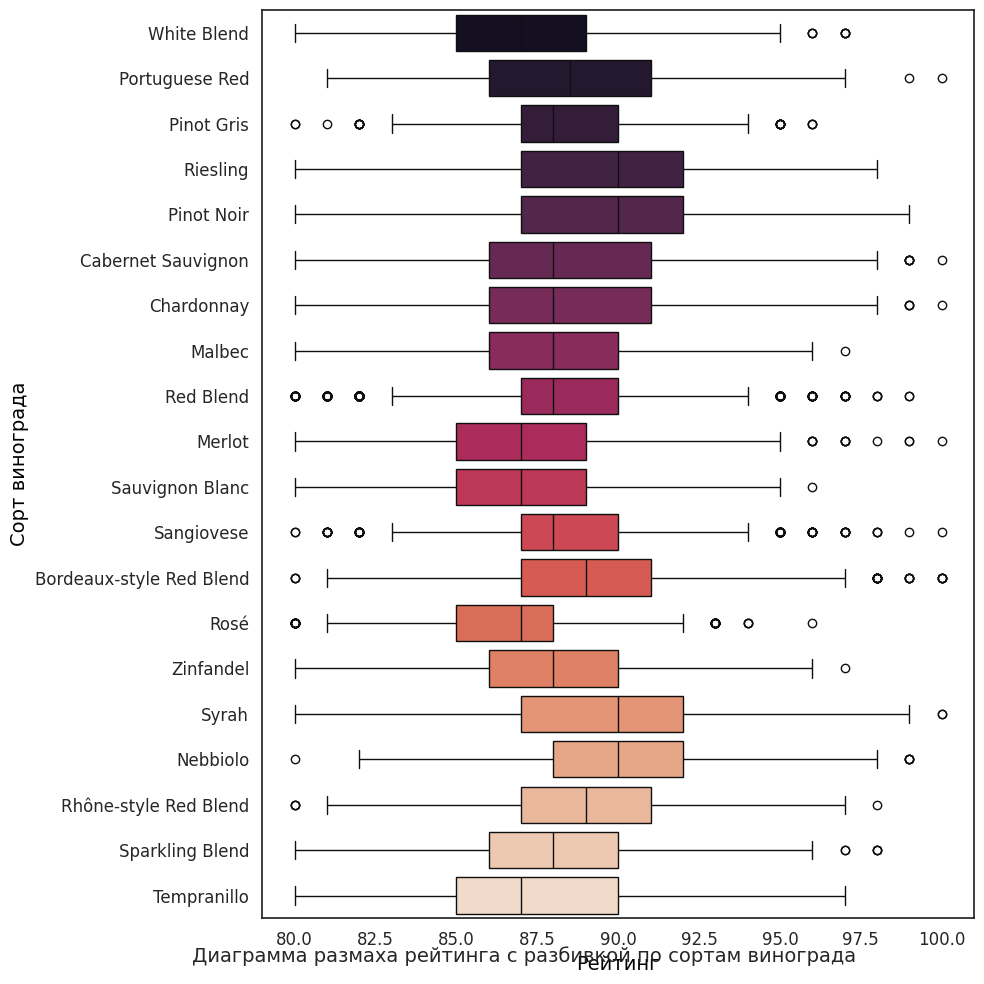

In [204]:
variety_top = df[df.variety.isin(
    df.variety.value_counts().head(20).index)]

fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(y='variety', x='points', data=variety_top, palette='rocket')
plt.xlabel('Рейтинг', fontsize=14, color='k')
plt.ylabel('Сорт винограда', fontsize=14, color='k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(
    0.2, 0.03,
    'Диаграмма размаха рейтинга с разбивкой по сортам винограда',
    fontsize=14)
plt.tight_layout() 
plt.show()

Визуально самые высокие средние рейтинги у сортов бордоский красный купаж и Неббиоло.
Визуально самые низкие средние рейтинги у сортов розе (конкретный сорт не указан) и Зинфандель.

## Влияние рейтинга вина на его цену.

#### Построим диаграмму рассеяния между параметрами стоимость и рейтинг.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.regplot(x='price', y='points', data=df)
plt.xlabel('Стоимость', fontsize=14, color='k')
plt.ylabel('Рейтинг', fontsize=14, color='k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(
    0.45, -0.01,
    'Диаграмма рассеяния рейтинга и цены',
    fontsize=14)
plt.tight_layout() 
plt.show()

 Построим диаграмму рассеяния между параметрами стоимость и рейтинг для набора данных очищенных от выбросов по цене.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.regplot(x='price', y='points', data=df_cleaned)
plt.xlabel('Стоимость', fontsize=14, color='k')
plt.ylabel('Рейтинг', fontsize=14, color='k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(
    0.25, -0.01, 
    'Диаграмма рассеяния рейтинга и цены, очищенные данные',
    fontsize=14)
plt.tight_layout() 
plt.show()

Визуально не определяется значительная зависимость между параметрами цена и рейтинг.<br>

#### Посчитаем корреляцию 

In [ ]:
df.corr()

Коэффициент корреляции между числовыми параметрами стоимость и рейтинг равен 0,423<br>
Между величинами есть слабая положительная зависимость.

In [ ]:
df_cleaned.corr()

Для очищенного от выбросов набора данных корреляция равна 0,54.<br>
Между величинами есть положительная зависимость средней степени.

In [ ]:
sns.heatmap(df_cleaned.corr(),
            cmap=sns.color_palette(n_colors=2, desat=None, as_cmap=False),
            annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(
    0.01, -0.01,
    'Матрица корреляции между стоимостью и рейтингом.',
    fontsize=14)
plt.show()

#### Проверим зависимости для разных ценовых сегментов.

In [ ]:
df_low_price.corr()

Для низкого ценового сегмента коэффициент корреляции между рейтингом и ценой равен 0,3.<br>
Слабая положительная зависимость. 

In [ ]:
df_medium_price.corr()

Для бюджетного ценового сегмента коэффициент корреляции между рейтингом и ценой равен 0,27.<br>
Слабая положительная зависимость. 

In [ ]:
df_high_price.corr()

Для бюджетного ценового сегмента коэффициент корреляции между рейтингом и ценой равен 0,15.<br>
Очень слабая положительная зависимость. 

In [ ]:
df_premium_price.corr()

Для бюджетного ценового сегмента коэффициент корреляции между рейтингом и ценой равен 0,266.<br>
Слабая положительная зависимость. 

 ## Выводы по этапу 'Исследовательский анализ данных': 
- В пятёрку самых популярных сортов винограда по провинциям входят: Пино-нуар - Калифорния, красный бордоский купаж - Бордо, Санджовезе - Тоскана, Пино-нуар - Орегон
- Самое дорогое вино: французское, цена - 2300 у.е., рейтинг - 99, сорт Bordeaux-style Red Blend, провинция - Бордо.
- В пятёрку самых дорогих вин входят вина из сортов: красный бордоский купаж, Шардоне, Грюнер Вельтлинер, Фурминт.
- В пятёрку самых высоких средних стоимостей вина входят вина провинций: Токай, Эгейский регион, Шампань, Санта-Круз, Израиль
- В пятёрку самых низких средних стоимостей вина входят вина провинций: Верхняя Венгрия, Резас, Приморско, Северо-Западная Италия, Рекиноа
- Определены свойства параметра цена (price) - Среднее значение = 33,4 у.е., медиана = 24 у.е., 75% данных находятся в диапозоне <= 40 у.е.
- Была произведена очистка от выбросов по цене
- Определены ценовые сегменты вин (низкий, бюджетный/средний, высокий, премиальный) и были отобраны данные в соответствии с этими сегментами:
    - Низкий: стоимость меньше нижнего квантиля, q25 = 16 у.е.
    - Бюджетный (средний): стоимость в диапозоне между нижним и средним квантилем, q25 = 16 у.е и q75 = 40 у.е 
    - Высокий: стоимость в диапозоне между верхним квантилем и 'верхним усом', q75 = 40 у.е и higher_whisker = 76 у.е. 
    - Премиальный: цена выше 'верхнего уса', higher_whisker = 76 у.е.
- Определены популярные вина в бюджетном сегменте. В топ-10 самых популярных сортов винограда в среднем ценовом сегменте входят: Шардоне - 18%, Пино-нуар - 16%, красный купаж - 13%, Каберне-совиньон - 12%, Шираз и Совиньон блан - 8%, Зинфандель и Рислинг - 7%, Мерло и красный бордоский купаж - 6%
- Топ-5 самых высокооценённых вин из среднего ценового сегмента произведены из сортов винограда Шардоне, Шираз, красный купаж, купаж сортов Семильон и Совиньон-блан.
- Топ-5 вин с наибольшими рейтингами изготовлены из следующих сортов винограда: Мерло, Шардоне, купаж Каберне, португальский красный купаж и и красный бордоский купаж.
- Построены графики «ящик с усами» по рейтингам с категоризацией по странам, по сортам вина
- Построена диаграмма рассеяния и расчитана корреляция параметров стоимость и рейтинг
- Между числовыми параметрами стоимость и рейтинг есть слабая положительная зависимость
- Для очищенного от выбросов по цене набора данных есть положительная зависимость средней степени
- При рассмотрении корреляционных зависимостей в сегментах рынка низкий, бюджетный/средний, высокий, премиальный не были выявлено сильных корреляционных зависимостей

## Влияние категориальных признаков на стоимость и рейтинг

In [284]:
# 1. Анализ 100-балльных вин
perfect_wines = df[df['points'] == 100]
print("🍷 ВИНА С 100 БАЛЛАМИ:")
print(f"Всего: {len(perfect_wines)}")
print(f"Уникальных наименований: {perfect_wines['title'].nunique()}")
print("\nЭксперты, выставлявшие 100 баллов:")
print(perfect_wines['taster_name'].value_counts())

🍷 ВИНА С 100 БАЛЛАМИ:
Всего: 19
Уникальных наименований: 19

Эксперты, выставлявшие 100 баллов:
taster_name
Roger Voss        10
Paul Gregutt       2
Joe Czerwinski     1
Kerin O’Keefe      1
Name: count, dtype: int64


In [291]:
perfect_wines[['title', 'country', 'price', 'variety', 'province', 'color', 'year']].sortby['price']

AttributeError: 'DataFrame' object has no attribute 'sortby'

In [ ]:
# Bubble plot: возраст vs цена vs рейтинг (размер пузырька = количество)

In [81]:
# Bubble plot: возраст vs цена vs рейтинг (размер пузырька = количество)
age_price_stats = df.groupby(pd.cut(df['wine_age'], bins=10)).agg({
    'price': 'mean',
    'points': 'mean',
    'wine_age': 'count'
}).reset_index()

plt.figure(figsize=(12, 8))
scatter = plt.scatter(age_price_stats['points'], 
                     age_price_stats['price'], 
                     s=age_price_stats['wine_age']/10,  # Размер пузырька
                     alpha=0.6, 
                     c=age_price_stats.index, 
                     cmap='viridis')

plt.colorbar(scatter, label='Возрастная группа')
plt.xlabel('Средний рейтинг')
plt.ylabel('Средняя цена (у.е.)')
plt.title('Bubble Plot: Возраст vs Цена vs Рейтинг\n(размер = количество вин)')

# Добавляем подписи для самых больших пузырьков
for i, row in age_price_stats.nlargest(3, 'wine_age').iterrows():
    plt.annotate(f"{row['wine_age']} вин", 
                (row['points'], row['price']),
                xytext=(10, 10), textcoords='offset points',
                fontsize=9, fontweight='bold')

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

NameError: name 'age_price_stats' is not defined

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='year', ylabel='price'>

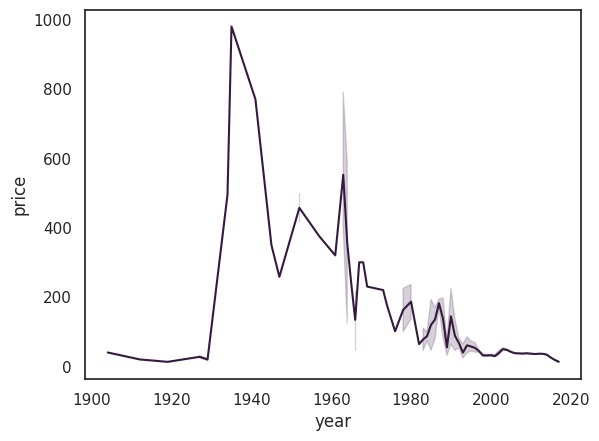

In [211]:
sns.lineplot(data=df, x="year", y="price")

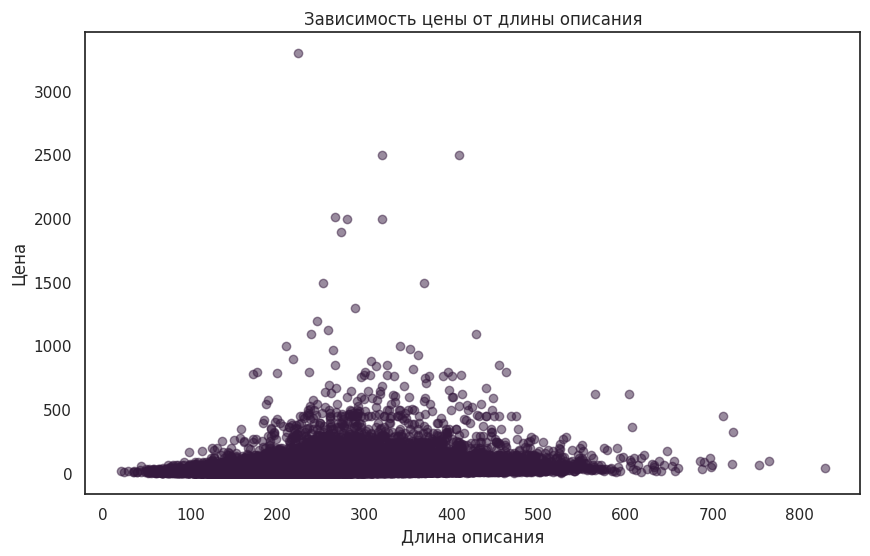

In [82]:
df['desc_length'] = df['description'].str.len()

plt.figure(figsize=(10, 6))
plt.scatter(df['desc_length'], df['price'], alpha=0.5)
plt.xlabel('Длина описания')
plt.ylabel('Цена')
plt.title('Зависимость цены от длины описания')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df, y='country', x='price')
plt.xlabel('Стоимости', fontsize=14, color='k')
plt.ylabel('Страны', fontsize=14, color='k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(0.35, -0.001,
            'Диаграмма рассеяния стоимостей вин по странам',
            fontsize=14)
plt.tight_layout() 
plt.show()

In [83]:
# Топ-10 самых популярных сортов по провинциям (отобраны по 1 из региона, самые многочисленные)
df.groupby('province').variety.apply(lambda x: x.value_counts()).sort_values(
    axis=0, ascending=False).to_frame().head(10)

variety
province                                    
California Pinot Noir                   6418
           Cabernet Sauvignon           5328
           Chardonnay                   4784
Bordeaux   Bordeaux-style Red Blend     4336
Oregon     Pinot Noir                   2560
Piedmont   Nebbiolo                     2478
California Zinfandel                    2458
Burgundy   Chardonnay                   2130
Tuscany    Red Blend                    1988
           Sangiovese                   1949

#### Топ-5 самых дорогих вин.

In [ ]:
df[['price', 'points', 'variety', 'country', 'province']].sort_values(
    by='price', axis=0, ascending=False).head()

Самое дорогое вино: французское, цена - 2300 у.е., рейтинг - 99, сорт Bordeaux-style Red Blend, провинция - Бордо.</br>
В пятёрку самых дорогих вин входят вина из сортов: красный бордоский купаж, Шардоне, 
Грюнер Вельтлинер, Фурминт.

#### Определим средние цены вин для каждого региона (province).

Топ-10 провинций с самыми высокими средними ценами на вино:

In [ ]:
df['price'].groupby(df['province']).mean().to_frame().sort_values(
    by='price', axis=0, ascending=False).head(10)

В пятёрку самых высоких средних стоимостей вина входят вина провинций: Токай, Эгейский регион, Шампань, Санта-Круз, Израиль

Топ-10 провинций с самыми низкими средними ценами на вино:

In [ ]:
df['price'].groupby(df['province']).mean().to_frame().sort_values(
    by='price', axis=0, ascending=True).head(10)

В пятёрку самых низких средних стоимостей вина входят вина провинций: Верхняя Венгрия, Резас, Приморско, Северо-Западная Италия, Рекиноа

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Боксплот рейтингов по странам
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='country', y='points')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Heatmap корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(df[['price', 'points']].corr(), annot=True)
plt.show()

### Выберем сорта вина с наибольшей стоимостью. Для каждого региона (province) найдём среднюю цену вина.

In [ ]:
# Проверка нормальности
from scipy import stats
stats.skew(df['price'])  # Асимметрия
stats.kurtosis(df['price'])  # Эксцесс

In [ ]:
# Анализ ценовых сегментов
price_bins = pd.cut(df['price'], bins=[0, 20, 50, 100, 1000])
price_bins.value_counts()

# Анализ по регионам
df.groupby('country')['points'].mean().sort_values(ascending=False)

# Корреляция цена-рейтинг
df[['price', 'points']].corr()

In [ ]:
df.groupby('province').variety.apply(lambda x: x.value_counts().nlargest(1)).sort_values(
    axis=0, ascending=False).to_frame().head(10)

В пятёрку самых популярных сортов винограда по провинциям входят: 
- Пино-нуар - Калифорния
- красный бордоский купаж - Бордо
- Санджовезе - Тоскана 
- Пино-нуар - Орегон

Топ-10 самых популярных сортов по провинциям.

В рамках составления структуры развития рынка вина в регионах необходимо определить:
* Самые популярные сорта (топ-5). 
* Влияет ли рейтинг на цены по регионам?

**Рассмотрим рынки вина в регионах Старый и Новый Свет.** <br>
<br>
Старый Свет — страны – традиционные производители вина в Европе: Франция, Италия Испания, Португалия, Греция, Германия, Австрия. В этих странах есть устоявшиеся винные традиции и четкое законодательство.<br>
Вина Нового Света — это вина, произведённые за пределами традиционных винодельческих районов Европы, в странах, куда виноделие было завезено. Это вина из Аргентины, Австралии, Чили, Новой Зеландии, ЮАР, Уругвая Соединенных Штатов, Канады. Эти страны обычно имеют меньше традиций и культуры в области виноделия.<br>
<br>
Рассмотрим, есть ли различие в ценах и рейтингах между этими двумя регионами.<br>

Создадим словарь и добавим параметр (old_new) Старый (old) и Новый (new) Свет.

In [ ]:
old_new = {
    'France': 'old',
    'Italy': 'old',
    'Spain': 'old',
    'Portugal': 'old',
    'Greece': 'old',
    'Germany': 'old',   
    'Austria': 'old',
    'Argentina': 'new',
    'Australia': 'new',
    'Chile': 'new',  
    'New Zealand': 'new',
    'South Africa':'new',
    'Uruguay': 'new',
    'US': 'new', 
    'Canada': 'new'   
}
df['old_new']=df['country'].map(old_new)
df.head(3)

Создадим наборы данных:
   - вина только Старого Света (df_old)
   - вина только Нового Света (df_new)

In [ ]:
df_old = df[(df['old_new'] == 'old')]
df_old.sample()

In [ ]:
df_new = df[(df['old_new'] == 'new')]
df_new.sample()

 ## Найдём для каждого из исследуемых регионов среднюю, максимальную и минимальную стоимость продукта.

In [ ]:
df_old['price'].describe().to_frame()

Для вин Старого Света:
- минимальная стоимость = 5 у.е. 
- максимальная стоимость = 2300 у.е.
- средняя стоимость = 37,17 у.е.
- мединная стоимость = 23 у.е.

In [ ]:
df_new['price'].describe().to_frame()

Для вин Нового Света:
- минимальная стоимость = 5 у.е. 
- максимальная стоимость = 550 у.е.
- средняя стоимость = 31,19 у.е.
- мединная стоимость = 25 у.е.

## Самые популярные сорта (топ-5).

In [ ]:
df_old['variety'].value_counts().to_frame().head(5)

In [ ]:
colors = sns.color_palette('PuRd')
df_old['variety'].value_counts().head().plot(
    kind='pie', figsize=[7, 7], colors=colors,
    autopct='%.0f%%',
    counterclock=True, startangle=90)
plt.yticks(fontsize=12)
plt.ylabel('Сорта винограда', fontsize=14, color='k')
plt.figtext(
    0.3, 0.1, 
    'Топ-5 популярных сортов Старого Света', 
    fontsize=14)
plt.show()

Пять самых популярных сортов винограда среди вин Старого Света: красный купаж (26%), бордоский красный купаж (24%), Шардоне (18%), Рислинг (18%), Санджовезе (15%).

In [ ]:
df_new['variety'].value_counts().to_frame().head(5)

In [ ]:
colors = sns.color_palette('PuRd')
df_new['variety'].value_counts().head().plot(
    kind='pie', figsize=[7, 7], colors=colors,
    autopct='%.0f%%',
    counterclock=True, startangle=90)
plt.yticks(fontsize=12)
plt.ylabel('Сорта винограда', fontsize=14, color='k')
plt.figtext(
    0.3, 0.1, 'Топ-5 популярных сортов Нового Света', fontsize=14)
plt.show()

Пять самых популярных сортов винограда среди вин Нового Света: Пино-нуар (28%), Каберне-совиньон (27%), Шардоне (24%), Совиньон-блан (11%), Шираз (11%).

Топ-5 вин с наилучшим рейтингом, произведённых в Старом Свете.

In [ ]:
df_old[['country', 'province', 'variety', 'points', 'price']].sort_values(
    by='points', axis=0, ascending=False).head(5)

Самоё высокооценённое вино Старого Света:
- произведено из винограда Шардоне, во Франции в провинции Шампань и стоит 1400 у.е.
- произведено из винограда Мерло, в Италии, в Тоскане и стоит 460 у.е.

Топ-5 вин с наилучшим рейтингом, произведённых в Новом Свете.

In [ ]:
df_new[['country', 'province', 'variety', 'points', 'price']].sort_values(
    by='points', axis=0, ascending=False).head(5)

Самоё высокооценённое вино Нового Света произведено из купажа Каберне, в США, Калифорнии и стоит 245 у.е.

## Влияет ли рейтинг на цены по регионам?

Для определения зависимости цены и рейтинга используем очищенные от выбросов по цене данные.

In [ ]:
df_old_cleaned = df_old[df_old['price'] <= higher_whisker]
df_new_cleaned = df_new[df_new['price'] <= higher_whisker]

Построим диаграмы рассеяния и посчитаем корреляции для цен и рейтинга, отдельно для регионов Старого и Нового Света

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.regplot(x='price', y='points', data=df_old_cleaned)
plt.xlabel('Стоимость', fontsize=14, color='k')
plt.ylabel('Рейтинг', fontsize=14, color='k')
plt.figtext(
    0.3, -0.01, 
    'Диаграмма рассеяния рейтинга и цены (Старый Свет)',
    fontsize=14)
plt.show()

In [ ]:
df_old_cleaned.corr()

Для вин Старого Света существует средняя положительная зависимость между рейтингом и ценой (коэффициент корреляции равен 0,59)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.regplot(x='price', y='points', data=df_old_cleaned)
plt.xlabel('Стоимость', fontsize=14, color='k')
plt.ylabel('Рейтинг', fontsize=14, color='k')
plt.figtext(
    0.3, -0.01, 
    'Диаграмма рассеяния рейтинга и цены (Новый Свет)',
    fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
df_new_cleaned.corr()

Для вин Нового Света существует средняя положительная зависимость между рейтингом и ценой (коэффициент корреляции равен 0,52)

Средниие значения рейтингов вин Старого и Нового Света незначительно отличаются 88,35 у Старого и 87,6 у Нового.

In [ ]:
df['points'].groupby(df['old_new']).mean().to_frame().sort_values(
    by='points', axis=0, ascending=False)

Средниие значения стоимостей вин Старого и Нового Света - 37,17 у.е. у Старого и 31,19 у.е. у Старого.

In [ ]:
df['price'].groupby(df['old_new']).mean().to_frame(
).sort_values(by='price', axis=0, ascending=False)

При использовании очищенного от выбросов по цене набора данных разница снижается и средняя стоимость вин Старого Света (27 у.е.) становится ниже, чем у нового (27,87 у.е.)

In [ ]:
df_cleaned['old_new'] = df_cleaned['country'].map(old_new)

df_cleaned['price'].groupby(df_cleaned['old_new']).mean().to_frame(
).sort_values(by='price', axis=0)

## Выводы по этапу 'Составление структуры развития рынка вина регионов':  
- определены объекты иссследования - рынки вина Старого и Нового Света
- добавлен параметр (old_new) Старый (old) и Новый (new) Свет
- определены пять самых популярных сортов винограда среди вин Старого Света: красный купаж (26%), бордоский красный купаж (24%), Шардоне (18%), Рислинг (18%), Санджовезе (15%)
- определены пять самых популярных сортов винограда среди вин Нового Света: Пино-нуар (28%), Каберне-совиньон (27%), Шардоне (24%), Совиньон-блан (11%), Шираз (11%)
- самоё высокооценённое вино Старого Света:
    - произведено из винограда Шардоне, во Франции в провинции Шампань и стоит 1400 у.е.
    - произведено из винограда Мерло, в Италии, в Тоскане и стоит 460 у.е.
- самоё высокооценённое вино Нового Света произведено из купажа Каберне, в США, Калифорнии и стоит 245 у.е.
- построены диаграмы рассеяния и посчитаны корреляции для цен и рейтинга, отдельно для регионов Старого и Нового Света
- для вин Старого Света существует средняя положительная зависимость между рейтингом и ценой (коэффициент корреляции равен 0,59)
- для вин Нового Света существует средняя положительная зависимость между рейтингом и ценой (коэффициент корреляции равен 0,52)
- средниие значения рейтингов вин Старого и Нового Света незначительно отличаются: 88,35 у Старого и 87,6 у Нового
- средниие значения стоимостей вин Старого и Нового Света: 37,17 у.е. у Старого и 31,19 у.е. у Старого; при использовании очищенного от выбросов по цене набора данных разница снижается и средняя стоимость вин Старого Света (27 у.е.) становится ниже, чем у нового (27,87 у.е.) 

В рамках исследования статистических показателей необходимо построить линейную регрессию зависимости между ценой продукта и его рейтингом.

#### Вычислим средние и медианные значения числовых признаков рейтинг и цена для регионов Старый Свет и Новый Свет

Расчитаем средние значения цены и рейтинга по странам для региона Старый Свет.

In [ ]:
df_old.groupby(df['country']).mean().sort_values(
    by=['price'], ascending=False)

Расчитаем медианные значения цены и рейтинга по странам для региона Старый Свет.

In [ ]:
df_old.groupby(df_old['country']).median().sort_values(
    by=['price'], ascending=False)

Расчитаем средние значения цены и рейтинга по странам для региона Новый Свет

In [ ]:
df_new.groupby(df_new['country']).mean().sort_values(
    by=['price'], ascending=False)

Расчитаем медианные значения цены и рейтинга по странам для региона Новый Свет

In [ ]:
df_new.groupby(df_new['country']).median().sort_values(
    by=['price'], ascending=False)

Исходя из значителной разницы между медианами и средними значениями можем сделать вывод о неравномерности распределения стоимости внутри каждой страны.

#### Вычислим дисперсию и стандартное отклонение числовых признаков рейтинг и цена для региона Старый Свет.

Рассчитаем дисперсию.

In [ ]:
df_old.groupby(df_old['country']).var()

Рассчитаем дисперсию для региона Старый Свет, с набором данных, очищенным от выбросов по цене.

In [ ]:
df_old_cleaned.groupby(df_old_cleaned['country']).var()

Посчитаем стандартное отклонение.

In [ ]:
df_old.groupby(df_old['country']).std()

В очищенном от выбросов по цене наборе данных дисперсия цен снизилась (И??)

Рассчитаем стандартное отклонение для региона Старый Свет, с набором данных, очищенным от выбросов по цене.

In [ ]:
df_old_cleaned.groupby(df_old_cleaned['country']).std()

В очищенном от выбросов по цене наборе данных дисперсия и стандартное отклонение цен снизилась, что позволяет точнее анализировать основную часть выборки (используя очищенные данные).

#### Вычислим дисперсию и стандартное отклонение числовых признаков рейтинг и цена для региона Новый Свет.

Рассчитаем дисперсию.

In [ ]:
df_new.groupby(df_new['country']).var()

Рассчитаем дисперсию для региона Новый Свет, с набором данных, очищенным от выбросов по цене.

In [ ]:
df_new_cleaned.groupby(df_new_cleaned['country']).var()

Посчитаем стандартное отклонение.

In [ ]:
df_new.groupby(df_new['country']).std()

Рассчитаем стандартное отклонение для региона Новый Свет, с набором данных, очищенным от выбросов по цене.

In [ ]:
df_new_cleaned.groupby(df_new_cleaned['country']).std()

В очищенном от выбросов по цене наборе данных дисперсия и стандартное отклонение цен снизилась, что позволяет точнее анализировать основную часть выборки (используя очищенные данные).

#### Построим гистограмму частоты встречающееся значений стоимости для Старого и Нового Света.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data=df_new_cleaned, x='price', stat='frequency',
             kde=True, label='Старый Свет')
sns.histplot(data=df_old_cleaned, x='price', stat='frequency', color='black',
             kde=True, label='Новый Свет')
plt.legend()
plt.xlabel('Стоимость', fontsize=14, color='k')
plt.ylabel('Частота', fontsize=14, color='k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(
    0.25, -0.01,
    'Гистограмма частоты встречающееся значений стоимости',
    fontsize=14)
plt.show()

На визуализации данных прослеживается, что значительное количество вин продаётся в бюджетном сегменте. <br>
В наборе данных Старый свет, есть типичные цены для вин, которые встречаются значительно чаще остальных.

#### Построим гистограмму частоты встречающееся значений рейтинга для Старого и Нового Света.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.histplot(data=df_new_cleaned, x='points', stat='frequency',
             bins=20, kde=True, label='Старый Свет')
sns.histplot(data=df_old_cleaned, x='points', stat='frequency', color='black',
             bins=20, kde=True, label='Новый Свет')
plt.legend()
plt.xlabel('Рейтинг', fontsize=14, color='k')
plt.ylabel('Частота', fontsize=14, color='k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(
    0.25, -0.01,
    'Гистограмма частоты встречающееся значений стоимости',
    fontsize=14)
plt.show()

Визуализируются два пика в районе значений рейтинга 87,4 и 90,2, что может говорить о наличии двух категорий качества вин.

## Построим линейную регрессию зависимости между ценой продукта и его рейтингом.

Используем отобранные данные, без выбросов по цене и без нулевых значений цен.<br>
Определяем данные для построения линейной регрессии.

In [ ]:
df_cleaned = df_cleaned.dropna(axis='index', how='any', subset=['price'])
df_cleaned.isna().sum()

In [ ]:
feature_cols = ['price']
X = df_cleaned[feature_cols]
y = df_cleaned.points

Импортируем класс LinearRegression, обучаем модель линейной регрессии.

In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X, y)

print ('Точка пересечения графика функции с осью Y: ', linreg.intercept_)
print ('Коэффициенты регрессии: ', linreg.coef_)

Уравнение зависимости рейтинга от цены:

points = 84,662 + 0,105*price

При увеличении на 1 единицу рейтинга цена возрастает на 9,52 у.е.

In [ ]:
y_pred = linreg.predict(X)

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label='Фактические данные')
plt.scatter(X, y_pred, label='Предсказаные данные', color='red')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Рейтинг', fontsize=14, color='k')
plt.xlabel('Цена', fontsize=14, color='k')
plt.legend()
plt.figtext(
    0.45, -0.05,
    'Диаграмма рассеяния рейтинга и цены',
    fontsize=14)
plt.show()

Рассмотрим метрики качества построенной модели:<br>
Вычислим среднеквадратичную ошибку ( mean squared error - MSE).<br>
Вычислим среднюю абсолютную ошибку (mean absolute error - MAE).<br>
Вычислим коэффициент детерминации (r2_score).

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print('MSE: ', mean_squared_error(y, y_pred))
print('MAE: ', mean_absolute_error(y, y_pred))
print('R2: ', r2_score(y, y_pred))

R2:  0.29 - 29% стоимости объясняется рейтингом. Взаимовязь между параметрами слабая <br>
Модель линейной регрессии имеет низкую предсказательную способность для данного набора данных.

#### Проверим, подходит ли модель линейной регрессии для вин Нового Света.

In [ ]:
df_old_cleaned = df_old_cleaned.dropna(
    axis='index', how='any', subset=['price'])
df_old_cleaned.isna().sum()

In [ ]:
feature_cols = ['price']
X = df_old_cleaned[feature_cols]
y = df_old_cleaned.points

In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X, y)

print('Точка пересечения графика функции с осью Y: ', linreg.intercept_)
print('Коэффициенты регрессии: ', linreg.coef_)

In [ ]:
y_pred = linreg.predict(X)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print('MSE: ', mean_squared_error(y, y_pred))
print('MAE: ', mean_absolute_error(y, y_pred))
print('R2: ', r2_score(y, y_pred))

Для вин Старого Света 34,5% стоимости объясняется рейтингом, что выше, чем в основном наборе данных. Взаимовязь между параметрами слабая. <br>
Модель линейной регрессии имеет низкую предсказательную способность для набора данных Старый Свет.

#### Проверим, подходит ли модель линейной регрессии для вин Нового Света.

In [ ]:
df_new_cleaned = df_new_cleaned.dropna(
    axis='index', how='any', subset=['price'])
df_new_cleaned.isna().sum()

In [ ]:
feature_cols = ['price']
X = df_new_cleaned[feature_cols]
y = df_new_cleaned.points

In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X, y)

print('Точка пересечения графика функции с осью Y: ', linreg.intercept_)
print('Коэффициенты регрессии: ', linreg.coef_)

In [ ]:
y_pred = linreg.predict(X)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print('MSE: ', mean_squared_error(y, y_pred))
print('MAE: ', mean_absolute_error(y, y_pred))
print('R2: ', r2_score(y, y_pred))

Для вин Нового Света 27,5% стоимости объясняется рейтингом, что ниже, чем в основном наборе данных. Взаимовязь между параметрами слабая. <br>
Модель линейной регрессии имеет низкую предсказательную способность для набора данных Новый Свет.

## Выводы по этапу 'Исследование статистических показателей зависимости цены вина от рейтинга в регионе':  
- были найдены средние и мединные значения для числовых признаков стоимость и рейтинг, отдельно для Старого, отдельно для Нового Света, с разбивкой по странам
- исходя из значителной разницы между медианами и средними значениями было сделано предположение о неравномерности распределения стоимости внутри каждой страны
- расчитанны дисперсия и стандартное отклонение числовых признаков рейтинг и цена для региона Старый Свет и Новый Свет с разбивкой по странам
- расчитанны дисперсия и стандартное отклонение числовых признаков рейтинг и цена для региона Старый Свет и Новый Свет с разбивкой по странам для очищенного от выбросов по цене наборов данных
- для наборов данных Старый и Новый Свет в очищенном от выбросов по цене наборе данных дисперсия и стандартное отклонение цен снизилась, что позволяет точнее анализировать основную часть выборки
- на визуализации данных прослеживается, что значительное количество вин продаётся в бюджетном сегменте. <br>
- в наборе данных Старый свет, есть типичные цены для вин, которые встречаются значительно чаще остальных.
- визуализируются два пика в районе значений рейтинга 87,4 и 90,2, что может говорить о наличии двух категорий качества вин
- построена модель линейной регрессии между ценой продукта и его рейтингом
- при увеличении на 1 единицу рейтинга цена возрастает на 9,52 у.е.
- расчитаны метрики качества построения модели
- только 29% стоимости объясняется рейтингом, взаимовязь между параметрами слабая
- модель линейной регрессии имеет низкую предсказательную способность для данного набора данных
- для вин Старого Света 34,5% стоимости объясняется рейтингом, что выше, чем в основном наборе данных. Взаимовязь между параметрами слабая.
- для вин Нового Света 27,5% стоимости объясняется рейтингом, что ниже, чем в основном наборе данных. Взаимовязь между параметрами слабая. <br>
- модель линейной регрессии имеет низкую предсказательную способность для набора данных Старый и Новый Свет

На основе проведенном анализе, были выявлены некоторые закономерности. Это позволяет сформулировать следующие гипотезы:

* H0: Средние пользовательские рейтинги вин Старого и Нового Света одинаковые.<br>
  H1:Средние пользовательские рейтинги вин Старого и Нового Света разные.<br>
<br>
* H0:Средние цены вин Старого и Нового Света одинаковые.<br>
  H1:Средние цены вин Старого и Нового Света разные.<br>
<br>
* Пороговое значение alpha - необходимо задать самостоятельно.

#### Выберем критический уровень значимости (α).

Выберем критический уровень значимости α = 0,05. Данное значение часто принимается в маркетенговых исследованиях.<br>
Вероятность отклонения нулевой гипотезы, в то время как она верна в данном случае будет составлять 5%.

In [ ]:
alpha = 0.05

## Проверим первые гипотизы.
* H0: Средние пользовательские рейтинги вин Старого и Нового Света одинаковые.<br>
-  H1:Средние пользовательские рейтинги вин Старого и Нового Света разные.

Проверим нормально ли распределение признака рейтинг для региона Старый Свет и Новый Свет.

In [ ]:
value, p = st.normaltest(df_old['points'])
print(value, p)
if p >= 0.05:
    print('Признак распределен нормально')
else:
    print('Признак распределен не нормально')

In [ ]:
value, p = st.normaltest(df_new['points'])
print(value, p)
if p >= 0.05:
	print('Признак распределен нормально')
else:
	print('Признак распределен не нормально')

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
rng = np.random.default_rng()
x = st.norm.rvs(loc=df_old.points.mean(), scale=df_old.points.std(),
                size=df_old.points.size, random_state=rng)
y = st.norm.rvs(loc=df_new.points.mean(), scale=df_new.points.std(),
                size=df_new.points.size, random_state=rng)
sns.histplot(ax=axs[0], data=x, kde=True, color='red', bins=20, alpha=0.5,
             fill=False)
sns.histplot(ax=axs[1], data=y, kde=True, color='red',
             bins=20, alpha=0.5, fill=False)
sns.histplot(ax=axs[0], data=df_old.points, color='blue',
             bins=20, alpha=0.5)
sns.histplot(ax=axs[1], data=df_new.points, color='black',
             bins=20, alpha=0.5)
plt.figtext(0.2, 0.0,
            'Сравнение рейтингов вин Старого и Нового Света с нормальным распределением',
            fontsize=14, color='k')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df_old['points'], color='red', kde=True, bins=20,
             element='step', label='Старый Свет')
sns.histplot(df_new['points'], color='blue', kde=True, bins=20,
             element='step', label='Новый Свет')
plt.xlabel('Рейтинг', fontsize=14, color='k')
plt.ylabel('Количество', fontsize=14, color='k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.figtext(
    0.35, -0.05,
    'Сравнение рейтингов вин Старого и Нового Света',
    fontsize=14, color='k')
plt.show()

Визуально также видим распределение признаков отличное от нормального.

Проверим одинаковость дисперсии рейтингов Старого и Нового Света.

In [ ]:
if np.var(df_old['points']) == np.var(df_new['points']):
    print('True')
else:
    print('False')

Выполним Т-тест, при условии неравества дисперсий.

In [ ]:
H0 = 'H0: Средние пользовательские рейтинги вин Старого и Нового Света одинаковые'
H1 = 'H1:Средние пользовательские рейтинги вин Старого и Нового Света разные.'

result = scipy.stats.ttest_ind(
    df_old['points'], df_new['points'], equal_var=False)
print('p-значение = ', result.pvalue)

if result.pvalue < alpha:
    print(f'Нулевая гипотеза отклонена ({H0}). Принимаем {H1}')
else:
    print(f'Нулевую гипотезу не получилось отклонить ({H0}).')

Рейтинги на вино Старого и Нового Света не одинаковы, так как значение p меньше α. 

Рассмотрим альтернативную гипотезу.<br>
Cреднее значение распределения, лежащего в основе первой выборки, меньше среднего значения распределения, лежащего в основе второй выборки.<br>
- Н1: Рейтинг вин Старого Света меньше, рейтинга вин Нового Света

In [ ]:
H1 = 'Н1: Рейтинг вин Старого Света меньше, рейтинга вин Нового Света'

result = scipy.stats.ttest_ind(df_old['points'], df_new['points'], equal_var=False,
                               alternative='less')
print('p-значение = ', result.pvalue)

if result.pvalue < alpha:
    print(f'Нулевая гипотеза отклонена ({H0}). Принимаем {H1}')
else:
    print(f'Нулевую гипотезу не получилось отклонить ({H0}).')

Рейтинг вин Старого Света не меньше, рейтинга вин Нового Света

Рассмотрим ещё одну альтернативную гипотезу.<br>
Среднее значение распределения, лежащего в основе первой выборки, больше, чем среднее значение распределения, лежащего в основе второй выборки.<br>
- Н1: Рейтинг вин Старого Света больше, рейтинга вина Нового Света

In [ ]:
H1 = 'Н1: Рейтинг вин Старого Света больше, рейтинга вина Нового Света'

result = scipy.stats.ttest_ind(df_old['points'], df_new['points'], equal_var=False,
                               alternative='greater')
print('p-значение = ', result.pvalue)

if result.pvalue < alpha:
    print(f'Нулевая гипотеза отклонена ({H0}). Принимаем {H1}')
else:
    print(f'Нулевую гипотезу не получилось отклонить ({H0}).')

#### В среднем рейтинги вин Старого Света выше, чем рейтинги вин Нового Света.

In [ ]:
df_old['points'].mean(), df_new['points'].mean()

Cредние значения по набору данных отличаются.<br>
Старый Свет - 88.35, Новый Свет - 87,6. <br>

## Проверим вторые гипотизы.
* H0: Средние цены вин Старого и Нового Света одинаковые.<br>
- H1: Средние цены вин Старого и Нового Света разные.<br>

Проверим нормально ли распределение признака цена для региона Старый Свет и Новый Свет.<br>
Используем данные очищенные от выбросов по цене.

In [ ]:
value, p = st.normaltest(df_old_cleaned['price'])
print(value, p)
if p >= 0.05:
    print('Признак распределен нормально')
else:
    print('Признак распределен не нормально')

In [ ]:
value, p = st.normaltest(df_new_cleaned['price'])
print(value, p)
if p >= 0.05:
    print('Признак распределен нормально')
else:
    print('Признак распределен не нормально')

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
rng = np.random.default_rng()
x = st.norm.rvs(loc=df_old_cleaned.price.mean(), scale=df_old_cleaned.price.std(),
                size=df_old_cleaned.price.size, random_state=rng)
y = st.norm.rvs(loc=df_new_cleaned.price.mean(),
                scale=df_new_cleaned.price.std(),
                size=df_new_cleaned.price.size, random_state=rng)
sns.histplot(ax=axs[0], data=x, kde=True, color='red',
             bins=20, alpha=0.5, fill=False)
sns.histplot(ax=axs[1], data=y, kde=True, color='red',
             bins=20, alpha=0.5, fill=False)
sns.histplot(ax=axs[0], data=df_old_cleaned.price,
             color='blue', bins=20, alpha=0.5)
sns.histplot(ax=axs[1], data=df_new_cleaned.price,
             color='black', bins=20, alpha=0.5)
plt.figtext(0.2, 0.0,
            'Сравнение стоимостей вин Старого и Нового Света с нормальным распределением',
            fontsize=14, color='k')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df_old_cleaned['price'], color='red', kde=True, bins=18,
             element='step', label='Старый Свет')
sns.histplot(df_new_cleaned['price'], color='blue', kde=True, bins=18,
             element='step', label='Новый Свет')
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Стоимость', fontsize=14, color='k')
plt.ylabel('Количество', fontsize=14, color='k')
plt.figtext(
    0.3, -0.05,
    'Сравнение стоимостей вин Старого и Нового Света',
    fontsize=14, color='k')
plt.show()

Визуально также видим ненормальное распределение признаков

Проверим одинаковость дисперсии стоимостей Старого и Нового Света.

In [ ]:
if np.var(df_old_cleaned['price']) == np.var(df_new_cleaned['price']):
    print('True')
else:
    print('False')

Выполним Т-тест, при условии неравества дисперсий.

In [ ]:
H0 = 'H0: Средние цены вин Старого и Нового Света одинаковые.'
H1 = 'H1: Средние цены вин Старого и Нового Света разные.'

result = scipy.stats.ttest_ind(df_old_cleaned['price'], df_new_cleaned['price'],
                               equal_var=False)
print('p-значение = ', result.pvalue)

if result.pvalue < alpha:
    print(f'Нулевая гипотеза отклонена ({H0}). Принимаем {H1}')
else:
    print(f'Нулевую гипотезу не получилось отклонить ({H0}).')

Рейтинги на вино Старого и Нового Света не равны, так как значение p меньше α. 

Рассмотрим альтернативную гипотезу.<br>
Cреднее значение распределения, лежащего в основе первой выборки, меньше среднего значения распределения, лежащего в основе второй выборки.<br>
- Н1: Стоимость вин Старого Света меньше, стоимости вин Нового Света.

In [ ]:
H1 = 'Н1: Стоимость вин Старого Света меньше, стоимости вин Нового Света'

result = scipy.stats.ttest_ind(df_old_cleaned['price'], df_new_cleaned['price'],
                               equal_var=False, alternative='less')
print('p-значение = ', result.pvalue)

if result.pvalue < alpha:
    print(f'Нулевая гипотеза отклонена ({H0}). Принимаем {H1}')
else:
    print(f'Нулевую гипотезу не получилось отклонить ({H0}).')

Рассмотрим ещё одну альтернативную гипотезу.<br>
Среднее значение распределения, лежащего в основе первой выборки, больше, чем среднее значение распределения, лежащего в основе второй выборки.<br>
- Н1: Стоимость вин Старого Света больше, стоимости вина Нового Света

In [ ]:
H1 = 'Н1: Стоимость вин Старого Света больше, стоимости вин Нового Света'

result = scipy.stats.ttest_ind(df_old_cleaned['price'], df_new_cleaned['price'],
                               equal_var=False, alternative='greater')
print('p-значение = ', result.pvalue)

if result.pvalue < alpha:
    print(f'Нулевая гипотеза отклонена ({H0}). Принимаем {H1}')
else:
    print(f'Нулевую гипотезу не получилось отклонить ({H0}).')

Стоимость вин Старого Света не больше, чем стоимости вина Нового Света

#### В среднем стоимости вин Старого Света ниже, чем стоимости вин Нового Света.

In [ ]:
df_old_cleaned['price'].mean(), df_new_cleaned['price'].mean()

Cредние значения цен по набору данных отличаются.<br>
Старый Свет - 27 у.е., Новый Свет - 27,87 у.е. <br>

## Выводы по этапу 'Проверка гипотез':  
- был принят критический уровень значимости α = 0,05
- сформулированы гипотезы о равентсве рейтингов вин Старого Света и Нового Света
- нулевая гипотеза о равенстве не подтвердилась
- были проверены альтернативные гипотезы о том, что среднее значение распределения, лежащего в основе первой выборки, больше, чем среднее значение распределения, лежащего в основе второй выборки, и наоборот
- было установлено, что в среднем рейтинги вин Старого Света выше, чем рейтинги вин Нового Света.
- посчитаны средние значения рейтингов для регионов:
    - Старый Свет - 88.35 
    - Новый Свет - 87,6
- сформулированы гипотезы о равентсве стоимостей вин Старого Света и Нового Света
-  нулевая гипотеза о равенстве не была подтверждена 
- были проверены альтернативные гипотезы о том, что среднее значение распределения, лежащего в основе первой выборки, больше, чем среднее значение распределения, лежащего в основе второй выборки, и наоборот
- было установлено, что в среднем стоимости вин Старого Света ниже, чем стоимости вин Нового Света.
- посчитаны средние значения стоимостей для регионов: 
    - Старый Свет - 27 у.е.
    - Новый Свет - 27,87 у.е.

## 6. Выводы по результатам аналитического исследования

Для анализа данных был взят набор данных из журнала Wine Enthusiast, в котором собраны обзоры на вина.<br>
После подключения необходимых библиотек для обработки и визуализации данных была произведена предобработка данных: удалены дубликаты, обработаны нулевые значения, добавлены дополнительные признаки.<br>
После проведения предварительной обработки получили данных набор данных для проведения анализа, состоящий из 17793 строк и 11 признаков.<br>
<br>
В полученном наборе данных представлено:
- 37 стран (самая часто встречающаяся - США)
- 309 виноделен (самая часто встречающаяся - Калифорния)
- 414 сортов винограда (самый часто встречающийся - Пино-нуар)
- 2 признака числовые (стоимость и рейтинг), остальные объектные
- диапазон изменения рейтинга 80-100: среднее значение 87,9, медианное значение 88.
- диапазон изменения стоимости от 5 у.е. до 2300 у.е.: среднее значение = 33,44 у.е., медианное 24 у.е.<br>

По результатам исследовательского аналила данных были определены самые популярные сорта винограда: Пино-нуар - Калифорния, красный бордоский купаж - Бордо, Санджовезе - Тоскана, Пино-нуар - Орегон.<br>
В пятёрку самых дорогих вин входят вина из сортов: красный бордоский купаж, Шардоне, Грюнер Вельтлинер, Фурминт.<br>
Самое дорогое вино: французское, цена - 2300 у.е., рейтинг - 99, сорт Bordeaux-style Red Blend, провинция - Бордо.<br>
Были определены ценовые сегменты вин (низкий, бюджетный/средний, высокий, премиальный) и были отобраны данные в соответствии с этими сегментами:
- Низкий: стоимость меньше нижнего квантиля, q25 = 16 у.е.
- Бюджетный (средний): стоимость в диапозоне между нижним и средним квантилем, q25 = 16 у.е и q75 = 40 у.е 
- Высокий: стоимость в диапозоне между верхним квантилем и 'верхним усом', q75 = 40 у.е и higher_whisker = 76 у.е. 
- Премиальный: цена выше 'верхнего уса', higher_whisker = 76 у.е.<br>
<br>

В топ-10 самых популярных сортов винограда в среднем ценовом сегменте входят: Шардоне - 18%, Пино-нуар - 16%, красный купаж - 13%, Каберне-совиньон - 12%, Шираз и Совиньон блан - 8%, Зинфандель и Рислинг - 7%, Мерло и красный бордоский купаж - 6%.<br>
Были построены диаграммы размаха рейтинга с разбивкой по странам и сортам винограда, диаграммы рассеяния рейтинга и цены. Между числовыми параметрами стоимость и рейтинг обнаружена слабая положительная зависимость. Для очищенного от выбросов по цене набора данных есть положительная зависимость средней степени. В отдельных сегментах рынка низкий, бюджетный/средний, высокий, премиальный не были выявлено сильных корреляционных зависимостей.<br>
<br>
Для дальнейшего анализа и сравнения были выбраны регион Старый Свет и Новый Свет. Между этими двумя регионами часто выбирает потребитель. <br>
Старый Свет — страны – традиционные производители вина в Европе: Франция, Италия Испания, Португалия, Греция, Германия, Австрия. В этих странах есть устоявшиеся винные традиции и четкое законодательство.<br>
Вина Нового Света — это вина, произведённые за пределами традиционных винодельческих районов Европы, в странах, куда виноделие было завезено. Это вина из Аргентины, Австралии, Чили, Новой Зеландии, ЮАР, Уругвая Соединенных Штатов, Канады. Эти страны обычно имеют меньше традиций и культуры в области виноделия.<br>
Пять самых популярных сортов винограда среди вин Старого Света: красный купаж (26%), бордоский красный купаж (24%), Шардоне (18%), Рислинг (18%), Санджовезе (15%).<br> 
Пять самых популярных сортов винограда среди вин Нового Света: Пино-нуар (28%), Каберне-совиньон (27%), Шардоне (24%), Совиньон-блан (11%), Шираз (11%).<br>
<br>
Самые высокооценённые вина Старого Света:
- произведено из винограда Шардоне, во Франции в провинции Шампань и стоит 1400 у.е.
- произведено из винограда Мерло, в Италии, в Тоскане и стоит 460 у.е., рейтинг 100<br>
<br>

Самоё высокооценённое вино Нового Света произведено из купажа Каберне, в США, Калифорнии и стоит 245 у.е., рейтинг 100.<br>
<br>
После построения диаграмы рассеяния и расчётов корреляции для цен и рейтинга, отдельно для регионов Старого и Нового Света было обнаружено следующее:
- для вин Старого Света существует средняя положительная зависимость между рейтингом и ценой (коэффициент корреляции равен 0,59)
- для вин Нового Света существует средняя положительная зависимость между рейтингом и ценой (коэффициент корреляции равен 0,52)<br>
<br>

По результатам построения модели линейной регрессии между ценой продукта и его рейтингом была установлена зависимость - при увеличении на 1 единицу рейтинга цена возрастает на 9,52 у.е.<br>
По расчитаным метрикам качества построения модели только 29% стоимости объясняется рейтингом, взаимовязь между параметрами слабая. Модель линейной регрессии имеет низкую предсказательную способность для данного набора данных. Метрики качества остались низкими при отдельной оценке наборов данных Старый и Новый Свет.<br>
<br>
Для проверки гипотез был принят критический уровень значимости α = 0,05. <br>
Сформулирваны гипотезы о равентсве рейтингов и стоимостей вин Старого Света и Нового Света. В обеих случаях нулевые гипотезы не подтвердились.<br> 
<br>
После расмотрения альтернативных гипотез было установлено:
- в среднем стоимости вин Старого Света ниже, чем стоимости вин Нового Света.
- в среднем стоимости вин Старого Света ниже, чем стоимости вин Нового Света